In [1]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
#########################################################
df = pd.read_csv('indexData.csv')
df_p = pd.read_csv('indexProcessed.csv')
info = pd.read_csv('indexInfo.csv')

In [2]:
info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [3]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [5]:
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)

In [6]:
new_features = ['p_change', 'close-1', 'close-1%', 'volume-1', 'volume-1%']
for i in new_features:
    df[i] = 0
    df[i] = df[i].astype('float')
    
for k in range(1, len(df)):
    if df['Index'][k] == df['Index'][k-1]:
        df['p_change'][k] = df['Close'][k] - df['Open'][k]
        df['close-1'][k] = df['Close'][k] - df['Close'][k-1]
        df['close-1%'][k] = ((df['Close'][k] / df['Close'][k-1]) * 100) - 100
        if df['Volume'][k] != 0 and df['Volume'][k-1] != 0:
            df['volume-1'][k] = df['Volume'][k] - df['Volume'][k-1]
            df['volume-1%'][k] = ((df['Volume'][k] / df['Volume'][k-1]) * 100) - 100

df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,p_change,close-1,close-1%,volume-1,volume-1%,year,month
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,0.0,0.000000,0.000000,0.0,0.0,1965,12
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,0.0,-1.479980,-0.279933,0.0,0.0,1966,1
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.0,0.630005,0.119498,0.0,0.0,1966,1
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.0,3.279968,0.621394,0.0,0.0,1966,1
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.0,0.950012,0.178870,0.0,0.0,1966,1


In [7]:
def eda():
    stocks = info['Index'].tolist()
    colors = {'NYA': '#41729F',
             'IXIC': '#5885AF',
             'HSI': '#274472',
             '000001.SS': '#C3E0E5',
             'N225': '#145DA0',
             'N100': '#0C2D48',
             '399001.SZ': '#2E8BC0',
             'GSPTSE': '#B1D4E0',
             'NSEI': '#BFD7ED',
             'GDAXI': '#60A3D9',
             'KS11': '#0074B7',
             'SSMI': '#003B73',
             'TWII': '#0E86D4',
             'J203.JO': '#68BBE3'}
    
    for stock in stocks:
        plt.figure(figsize = (15, 7))
        plt.title(stock, size = 35, y = 1.03, fontname = 'monospace')
        plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
        a = sns.lineplot(x = "Date", y = "Close", data = df.query("Index == @stock"), color = colors.get(stock), linewidth = 0.5)
        plt.ylabel('Close price', size = 14, fontname = 'monospace')
        plt.xlabel('')
        plt.yticks(size = 12, fontname = 'monospace')
    
        for j in ['right', 'top']:
            a.spines[j].set_visible(False)
        for j in ['bottom', 'left']:
            a.spines[j].set_linewidth(1.3)
    
        plt.show()

        fig = plt.figure(figsize = (15, 15))
        plt.subplot(221)
        plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
        a = sns.lineplot(x = "Date", y = "close-1", data = df.query("Index == @stock"), color = colors.get(stock), linewidth = 0.5)
        plt.ylabel('Price changes', size = 14, fontname = 'monospace')
        plt.xlabel('')
        plt.yticks(size = 12, fontname = 'monospace')

        plt.subplot(222)
        plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
        b = sns.lineplot(x = "Date", y = "close-1%", data = df.query("Index == @stock"), color = colors.get(stock), linewidth = 0.5)
        plt.ylabel('Price changes %', size = 14, fontname = 'monospace')
        plt.xlabel('')
        plt.yticks(size = 12, fontname = 'monospace')
    
        plt.subplot(223)
        plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
        c = sns.lineplot(x = "Date", y = "volume-1", data = df.query("Index == @stock"), color = colors.get(stock), linewidth = 0.5)
        plt.ylabel('Volume changes', size = 14, fontname = 'monospace')
        plt.xlabel('')
        plt.yticks(size = 12, fontname = 'monospace')
    
        plt.subplot(224)
        plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
        d = sns.lineplot(x = "Date", y = "volume-1%", data = df.query("Index == @stock"), color = colors.get(stock), linewidth = 0.5)
        plt.ylabel('Volume changes %', size = 14, fontname = 'monospace')
        plt.xlabel('')
        plt.yticks(size = 12, fontname = 'monospace')

        for i in [a,b,c,d]:
            for j in ['right', 'top']:
                i.spines[j].set_visible(False)
            for j in ['bottom', 'left']:
                i.spines[j].set_linewidth(1.3)
        
        plt.figtext(0.5, -0.001, 'whitespace', color = 'white')
    
        plt.show()

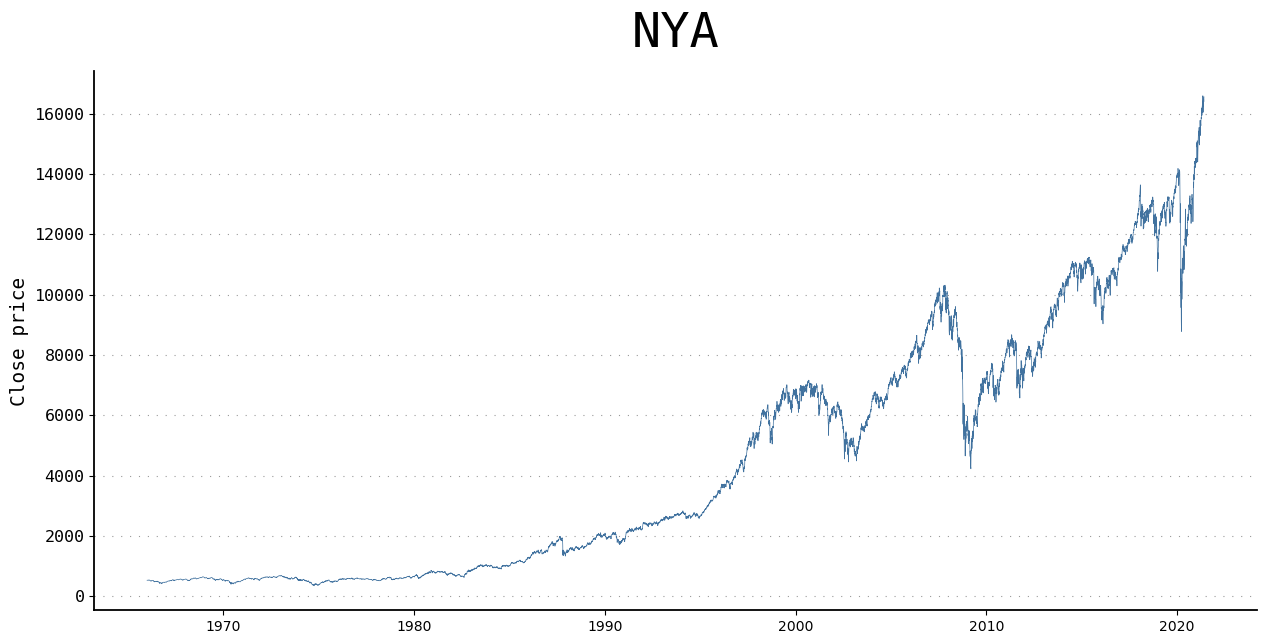

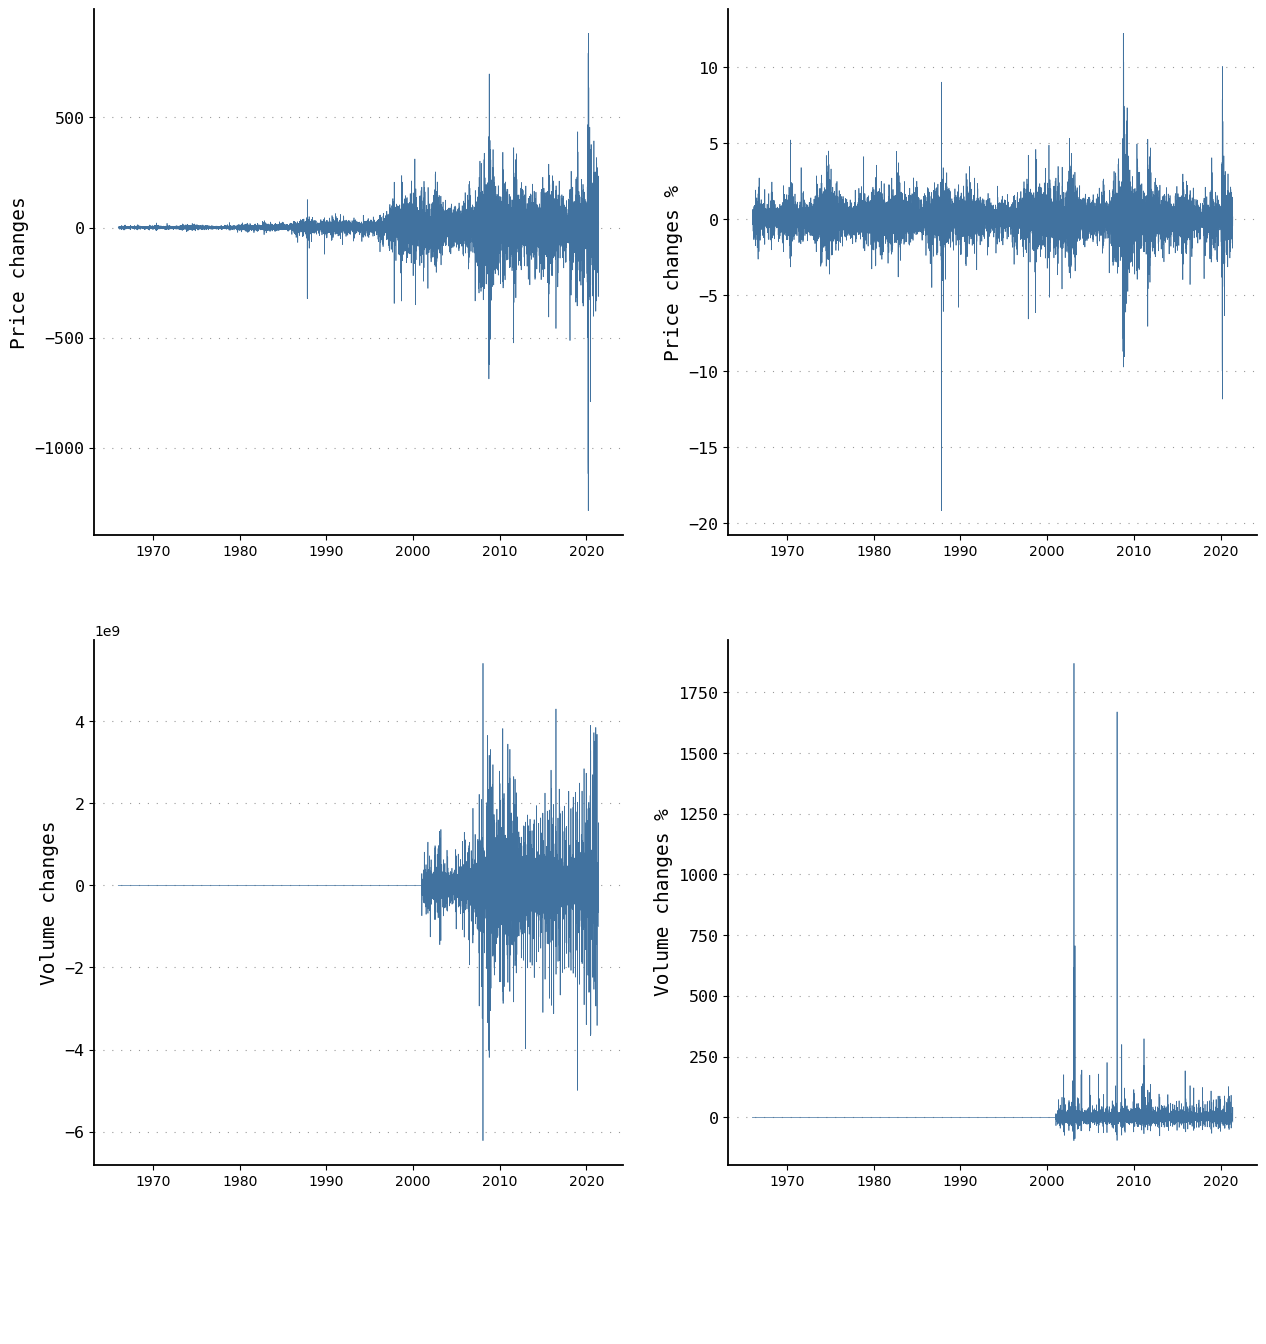

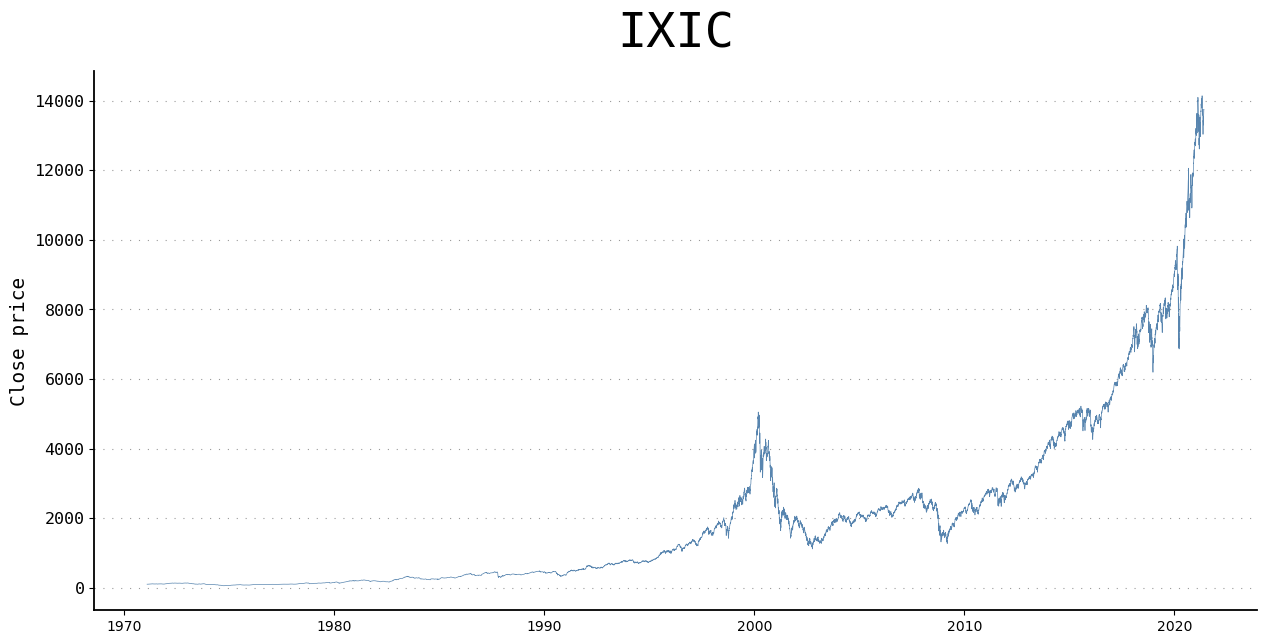

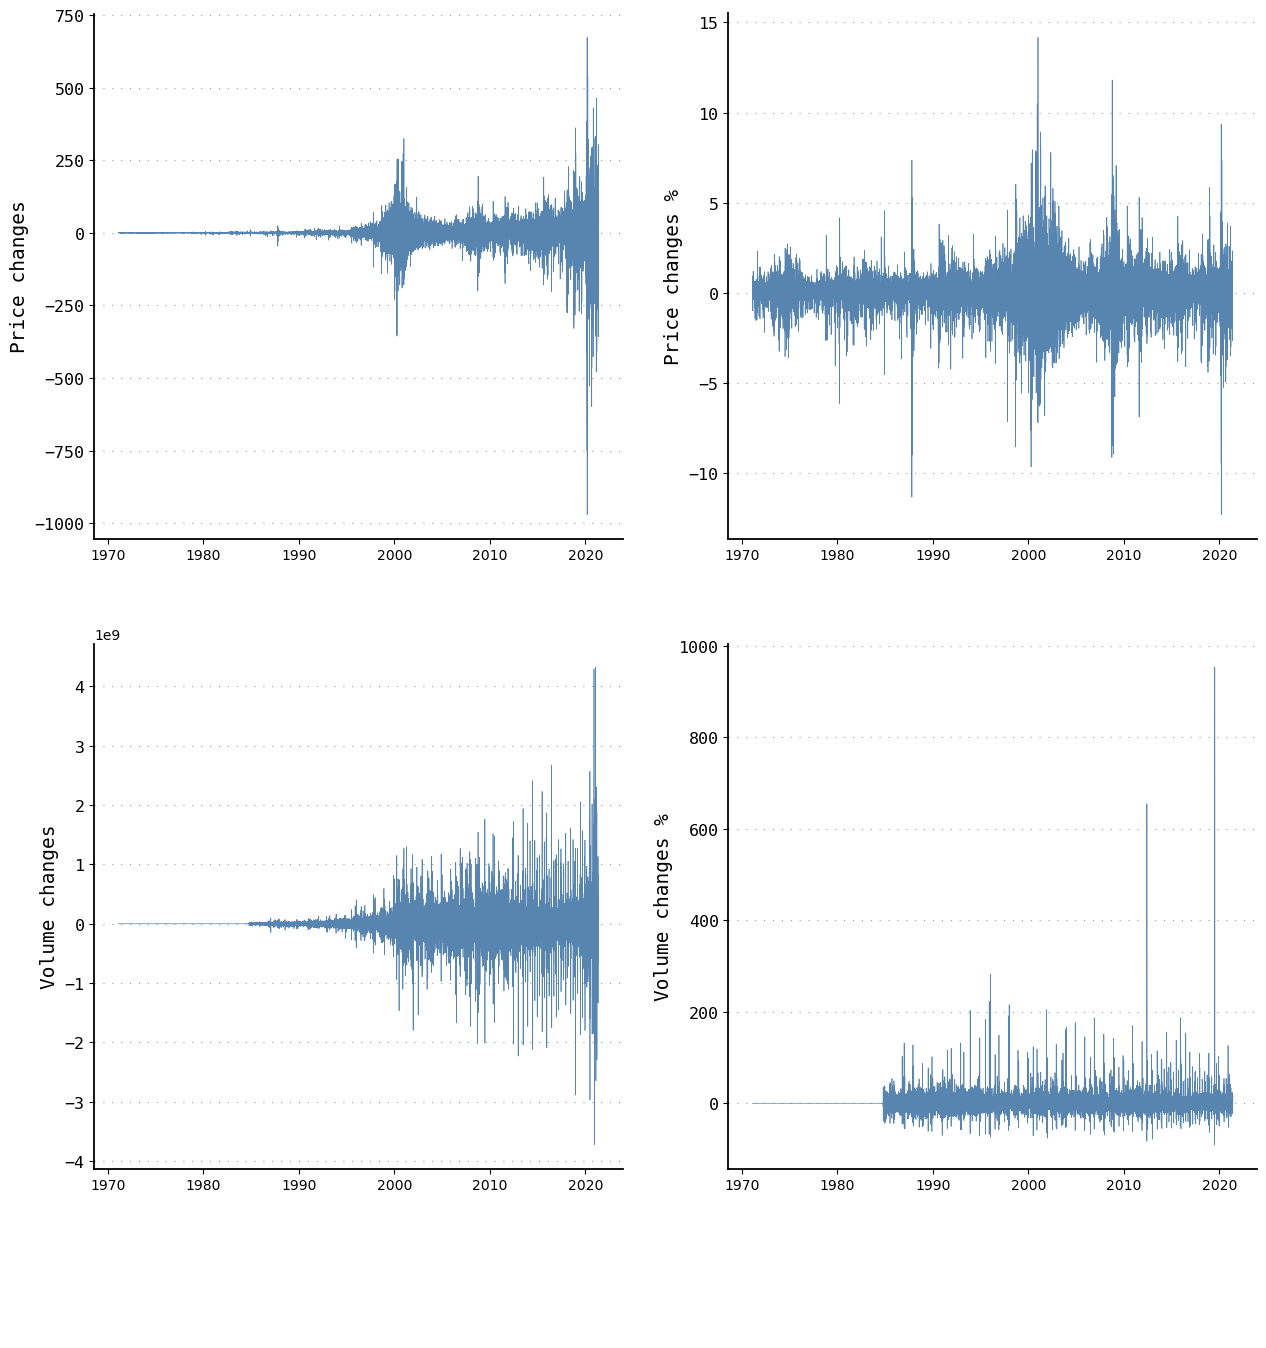

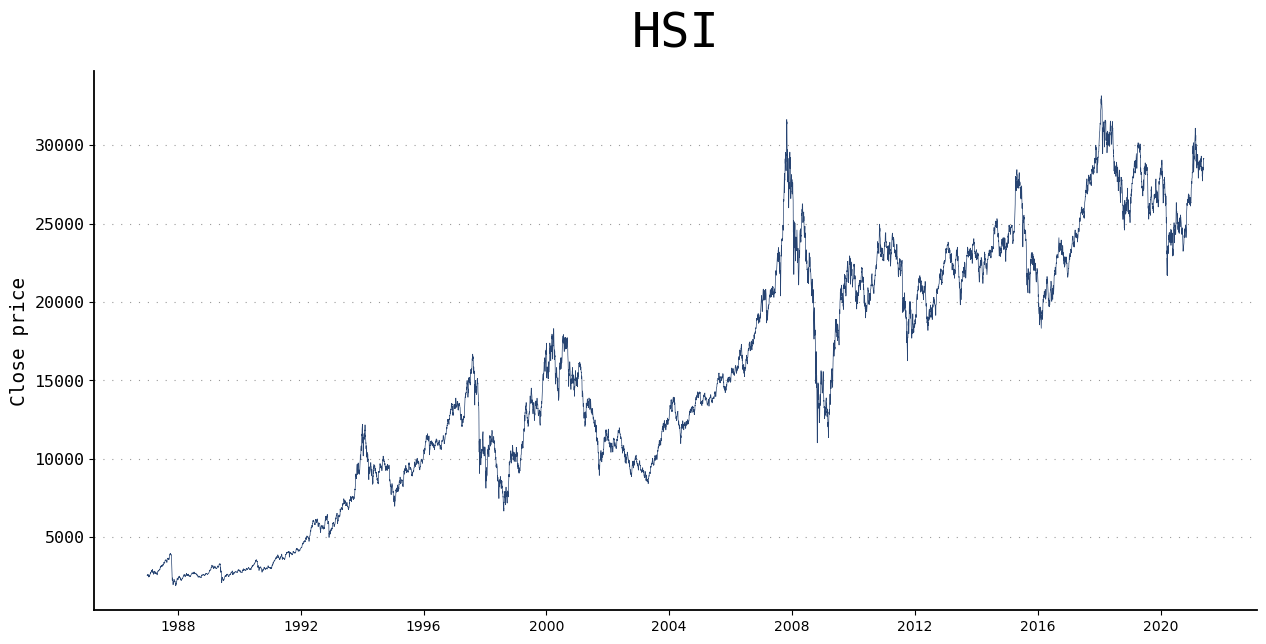

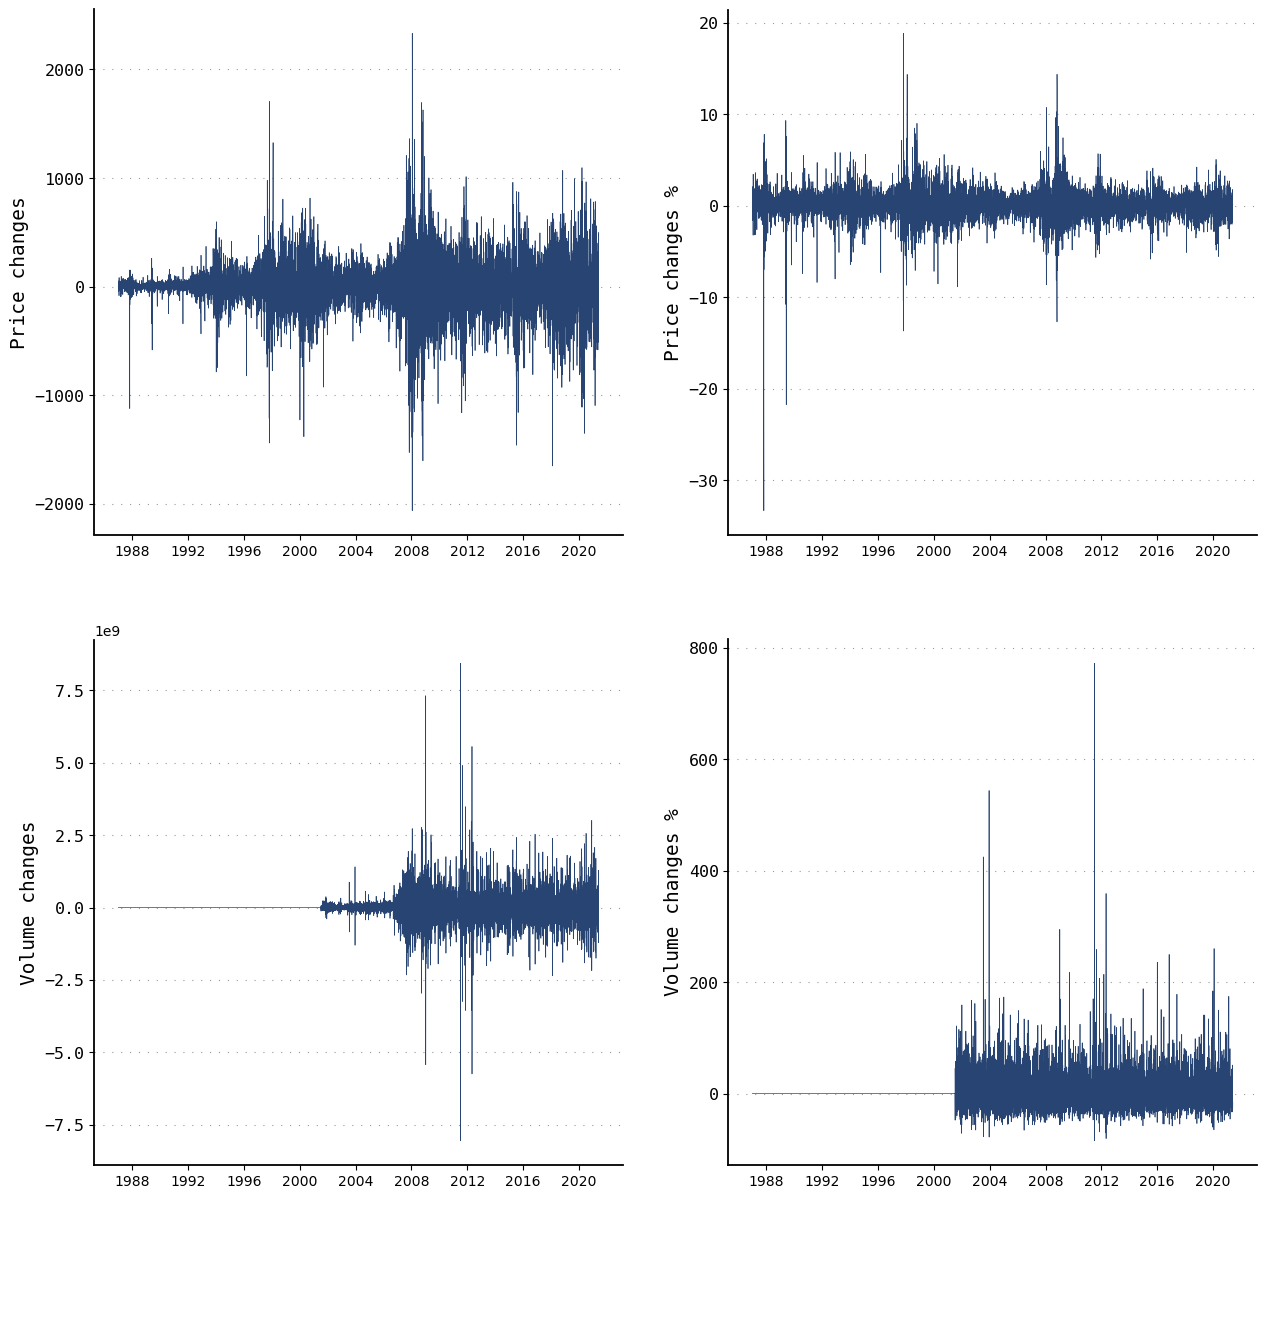

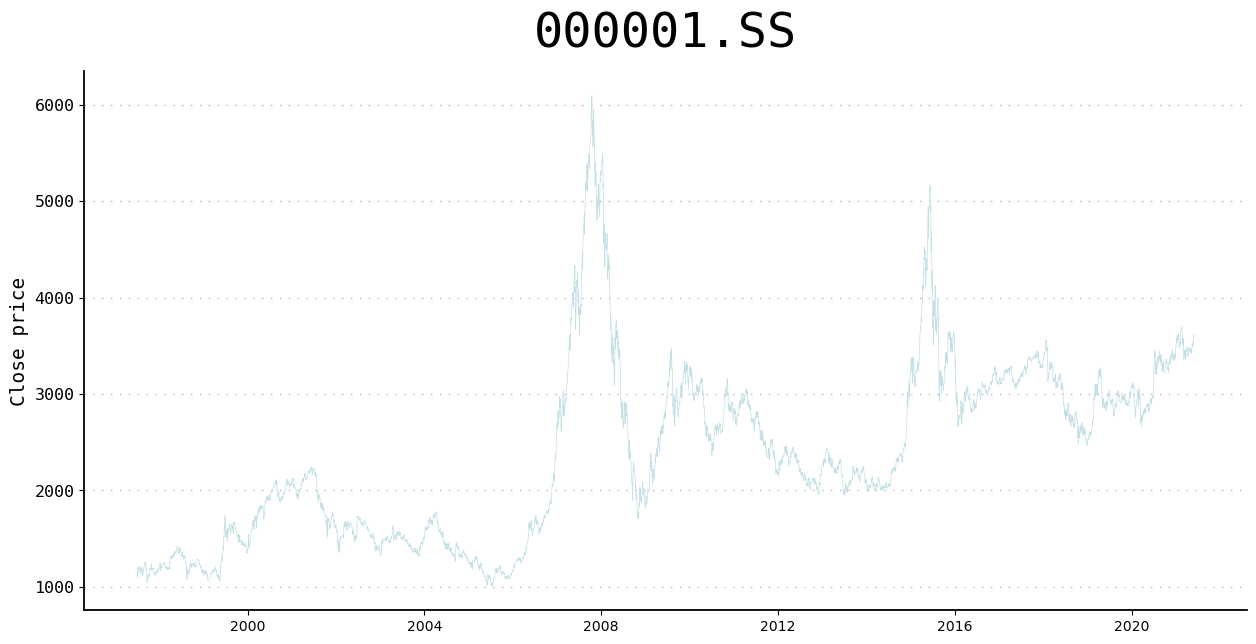

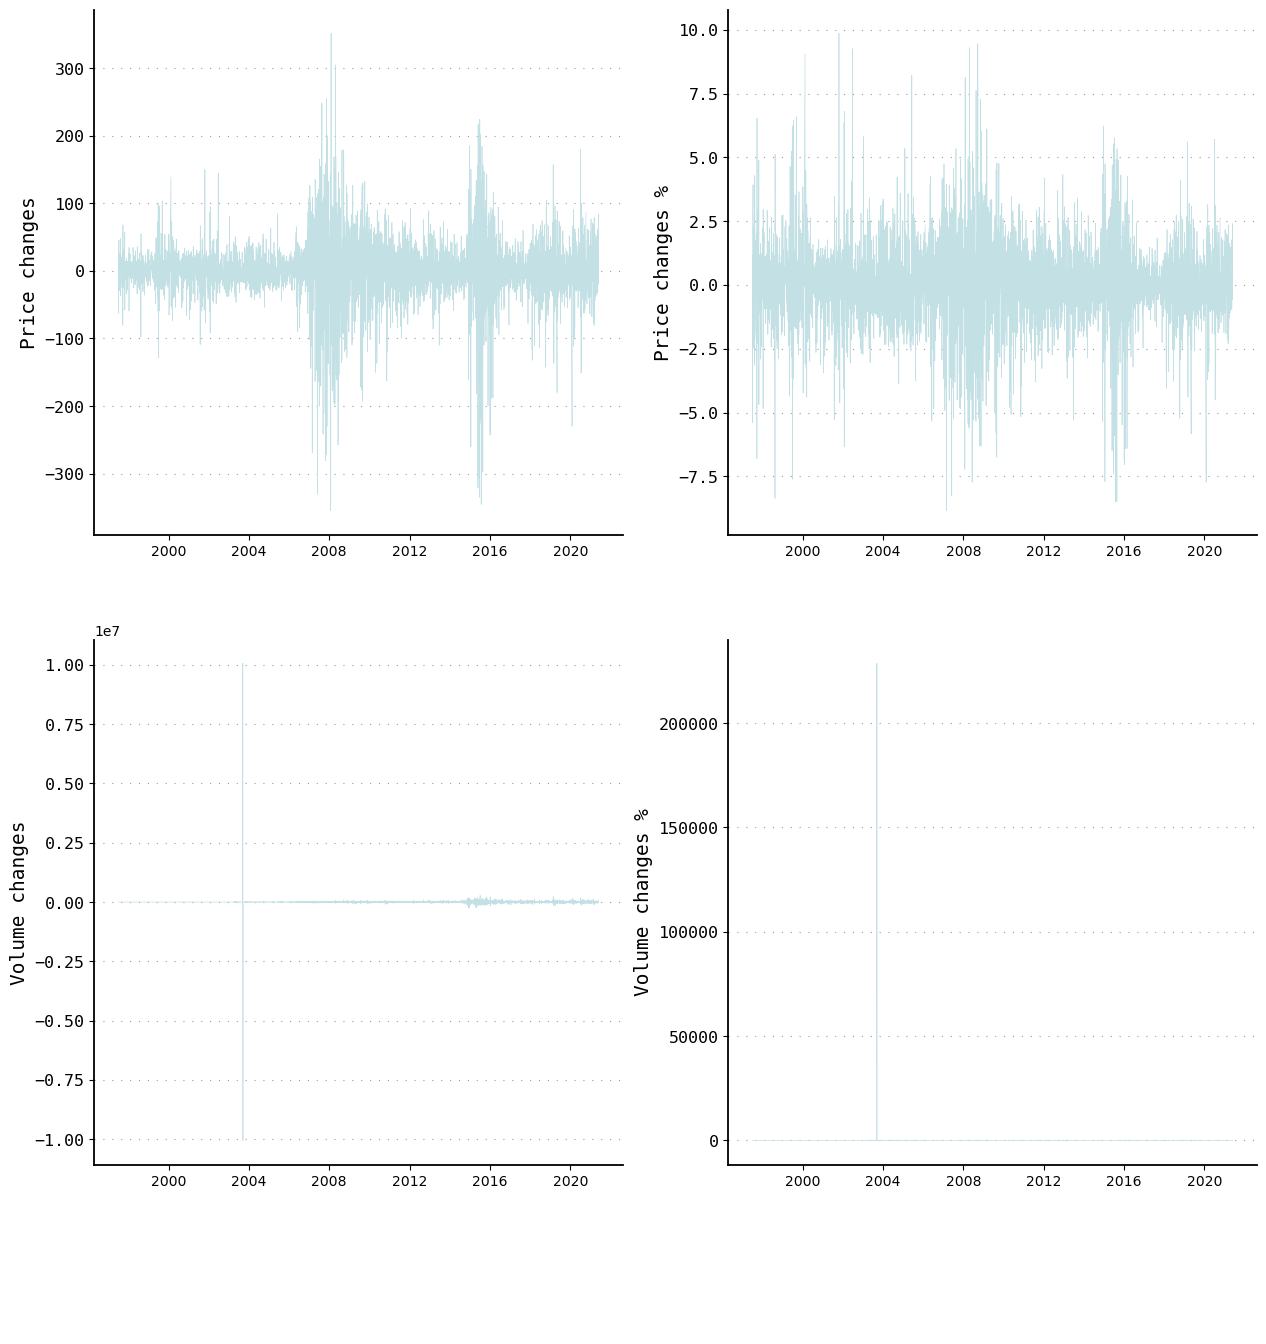

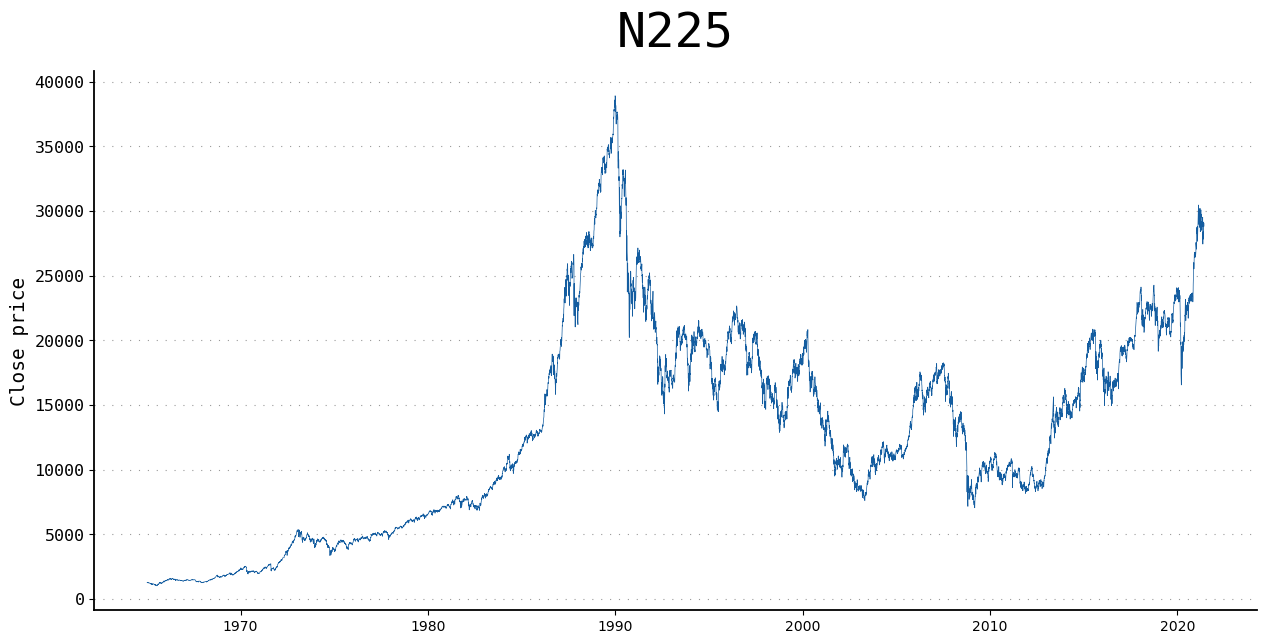

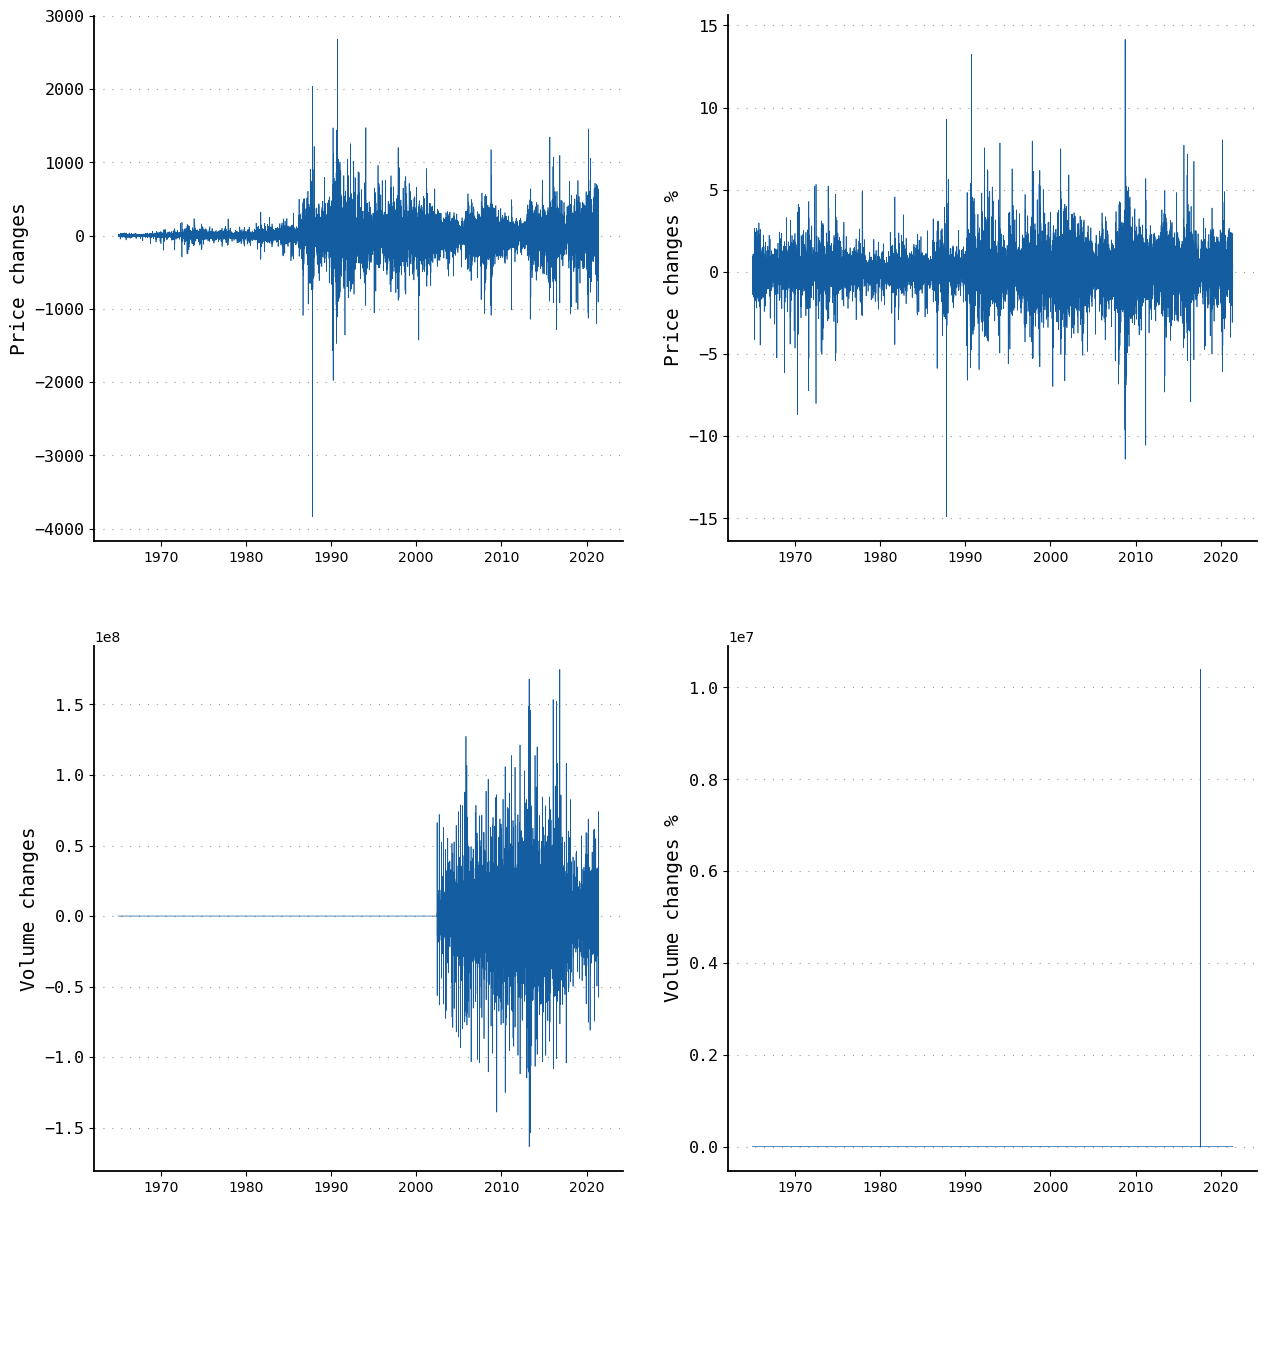

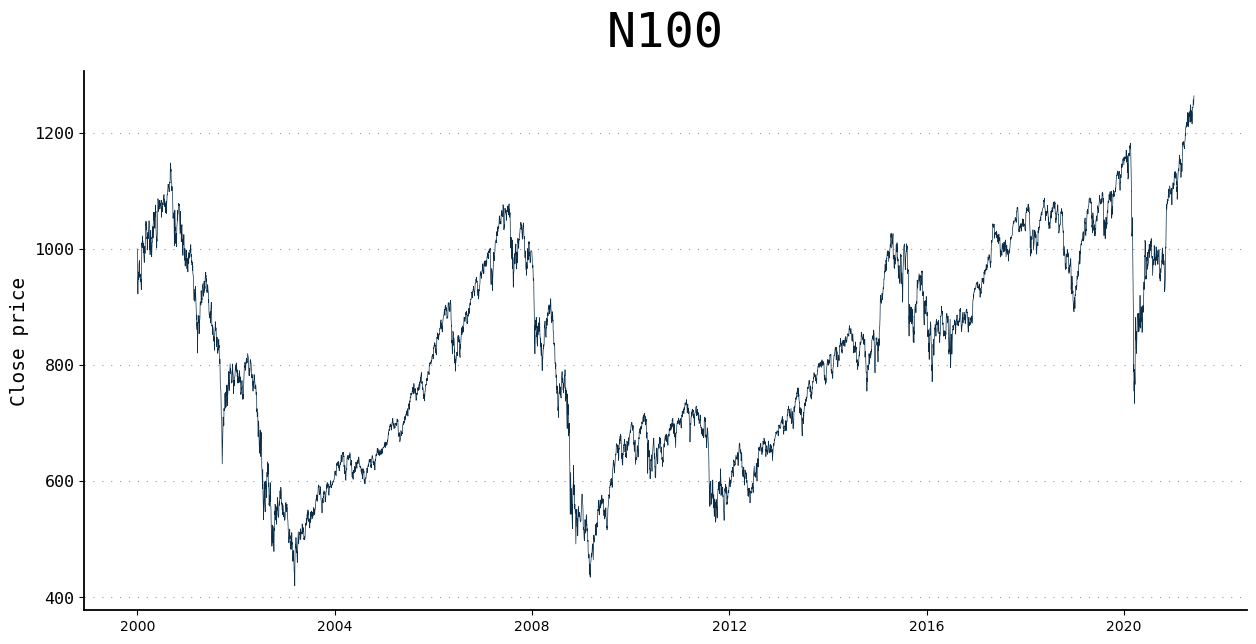

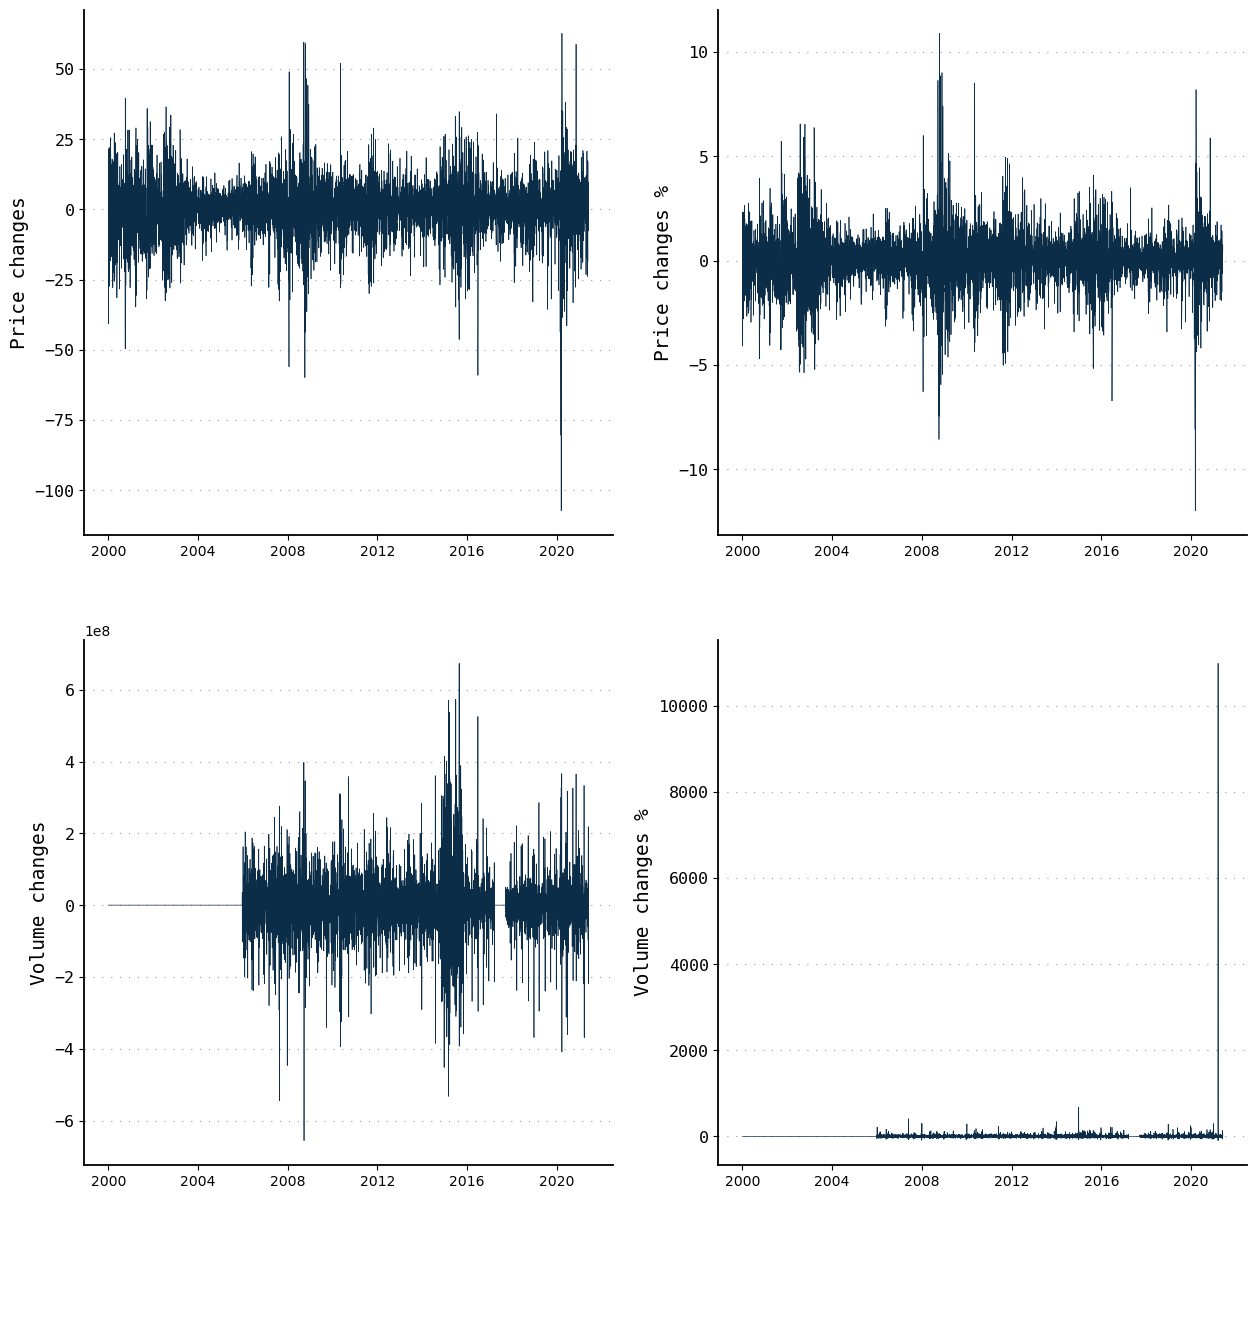

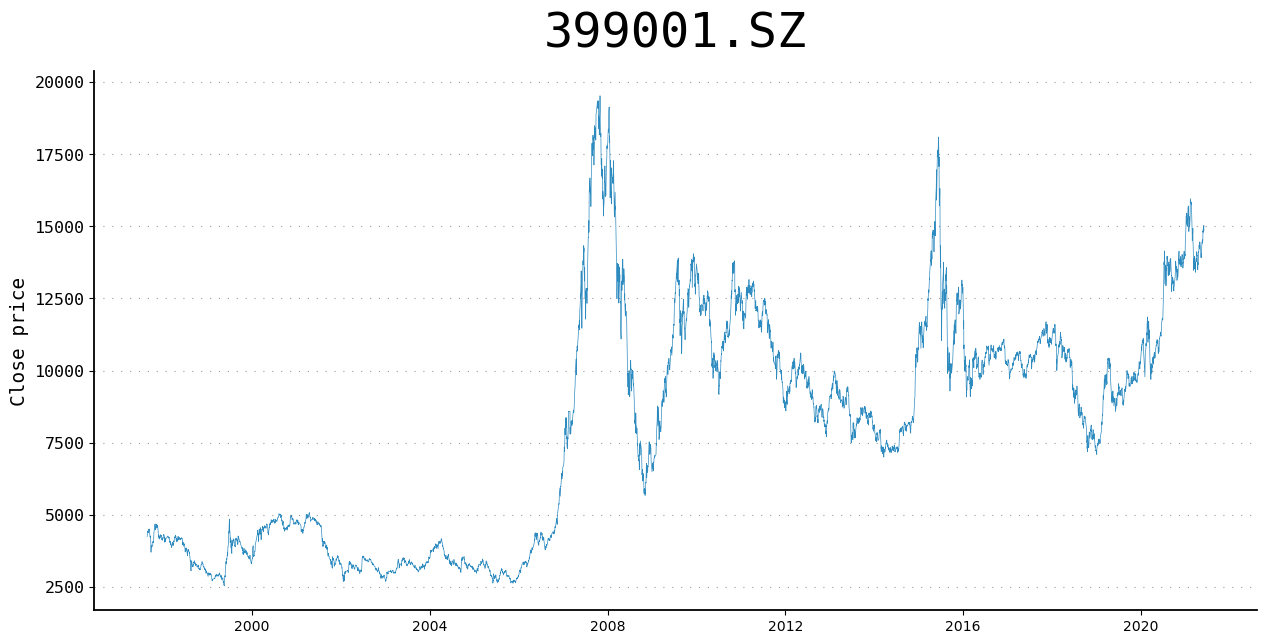

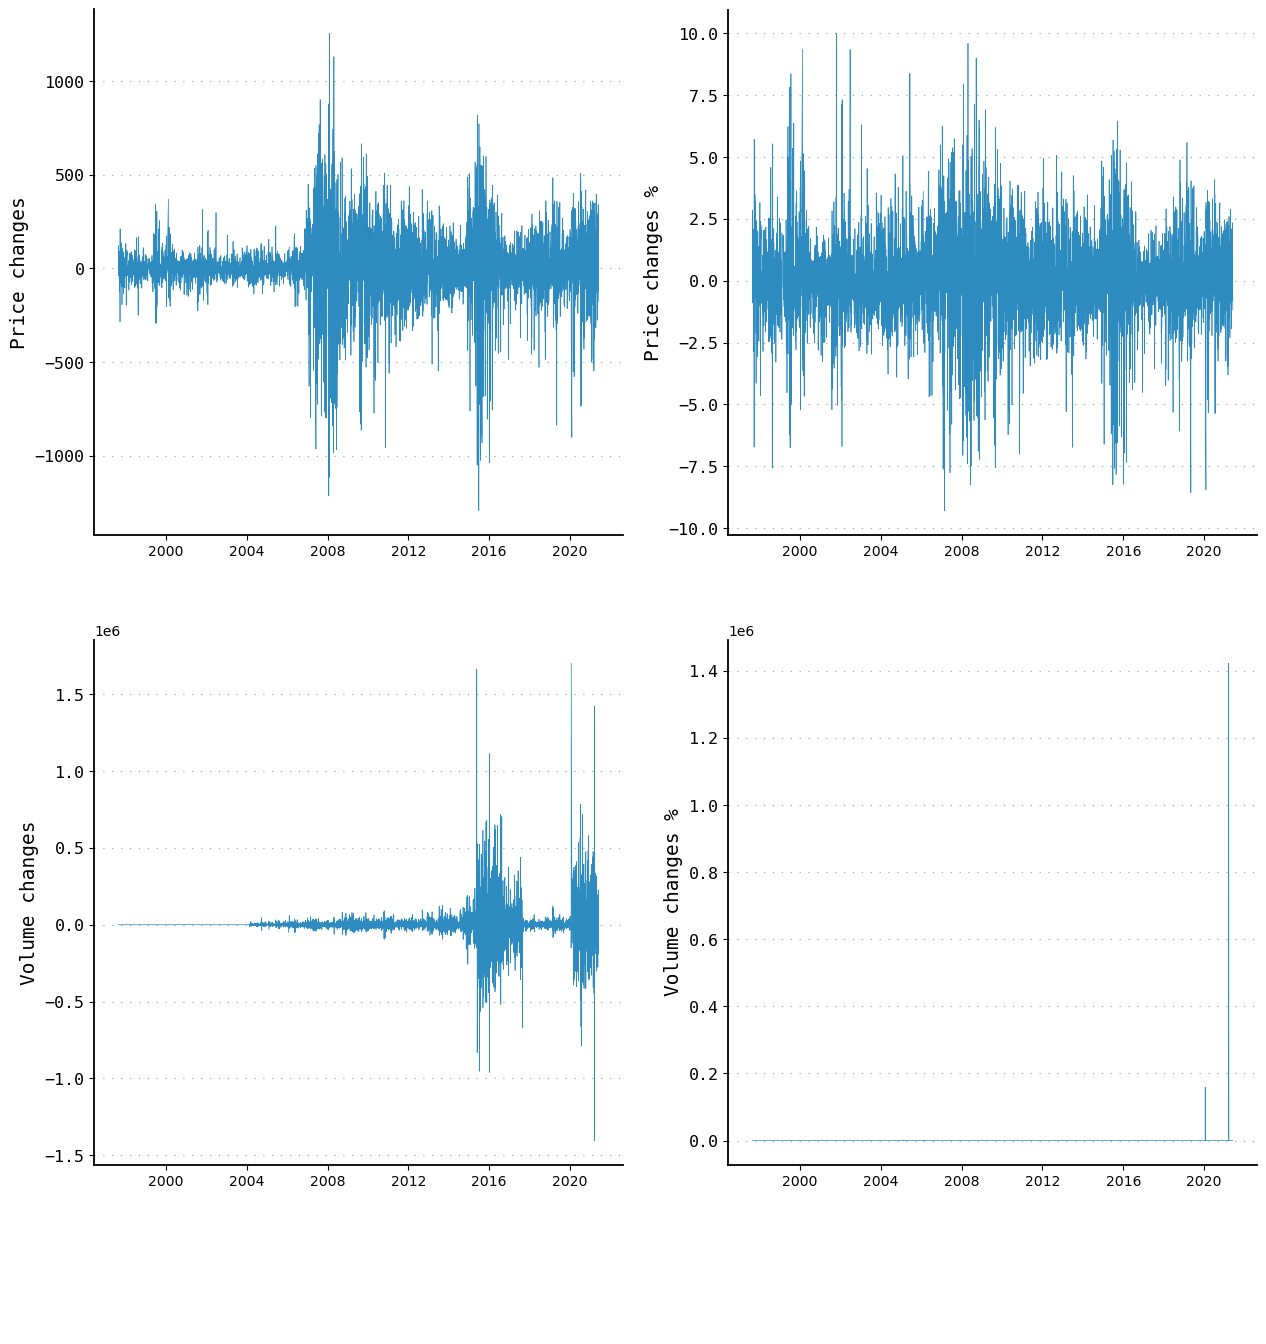

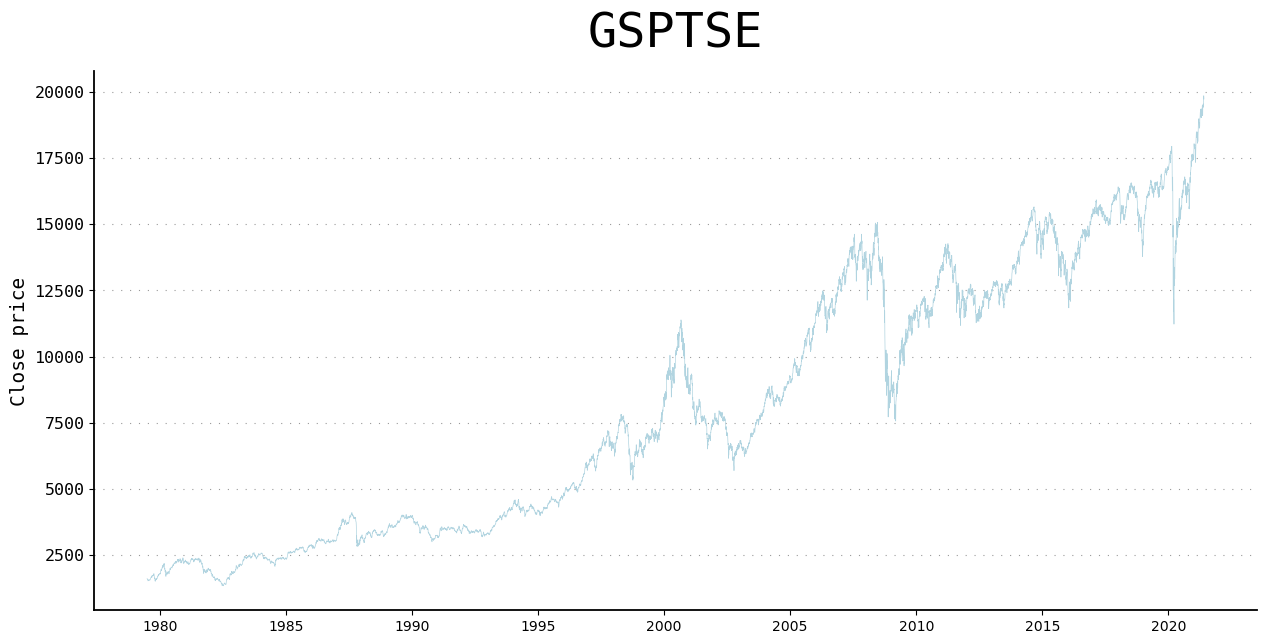

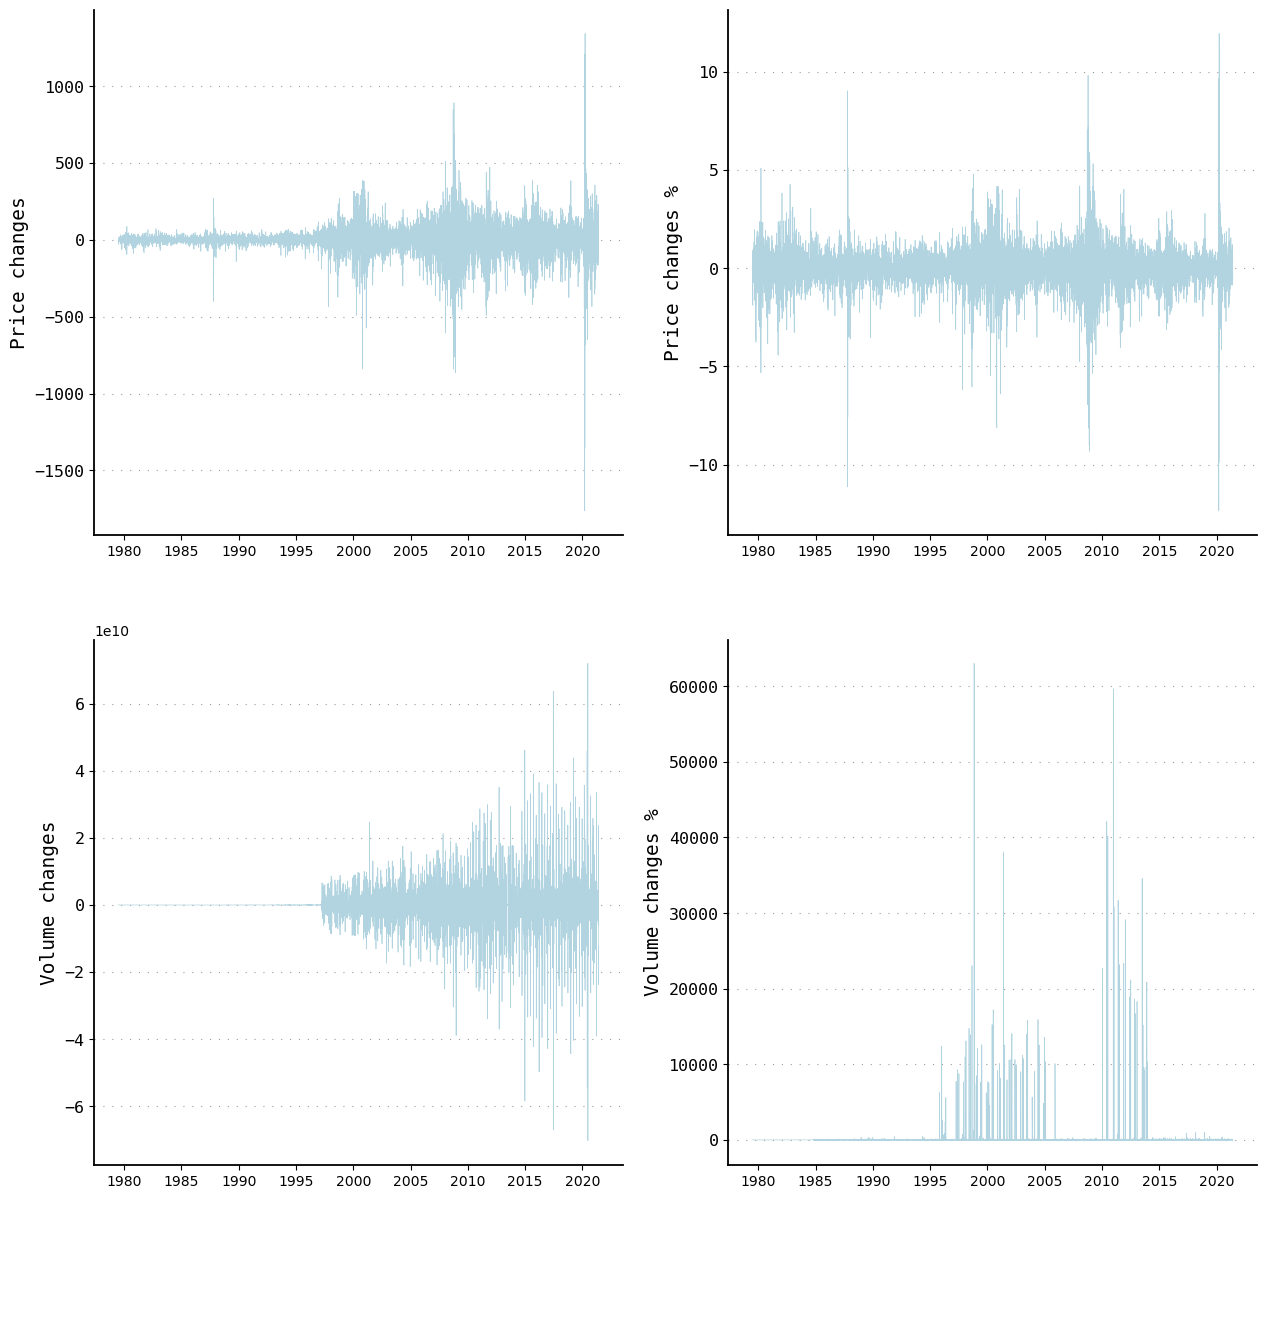

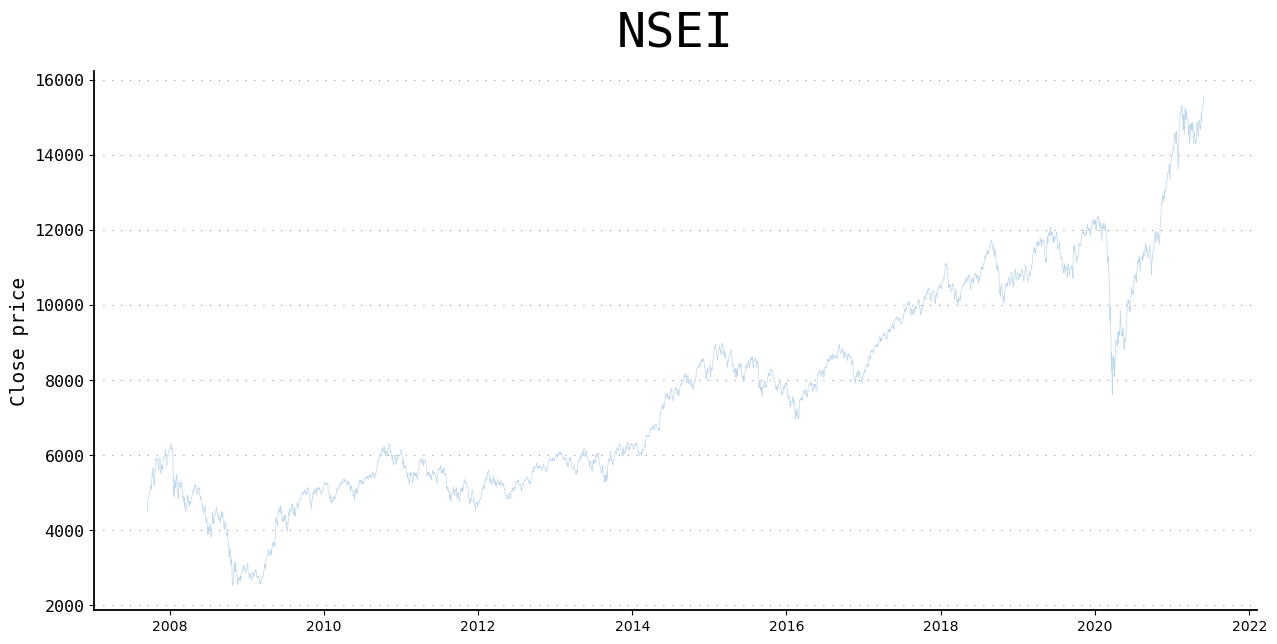

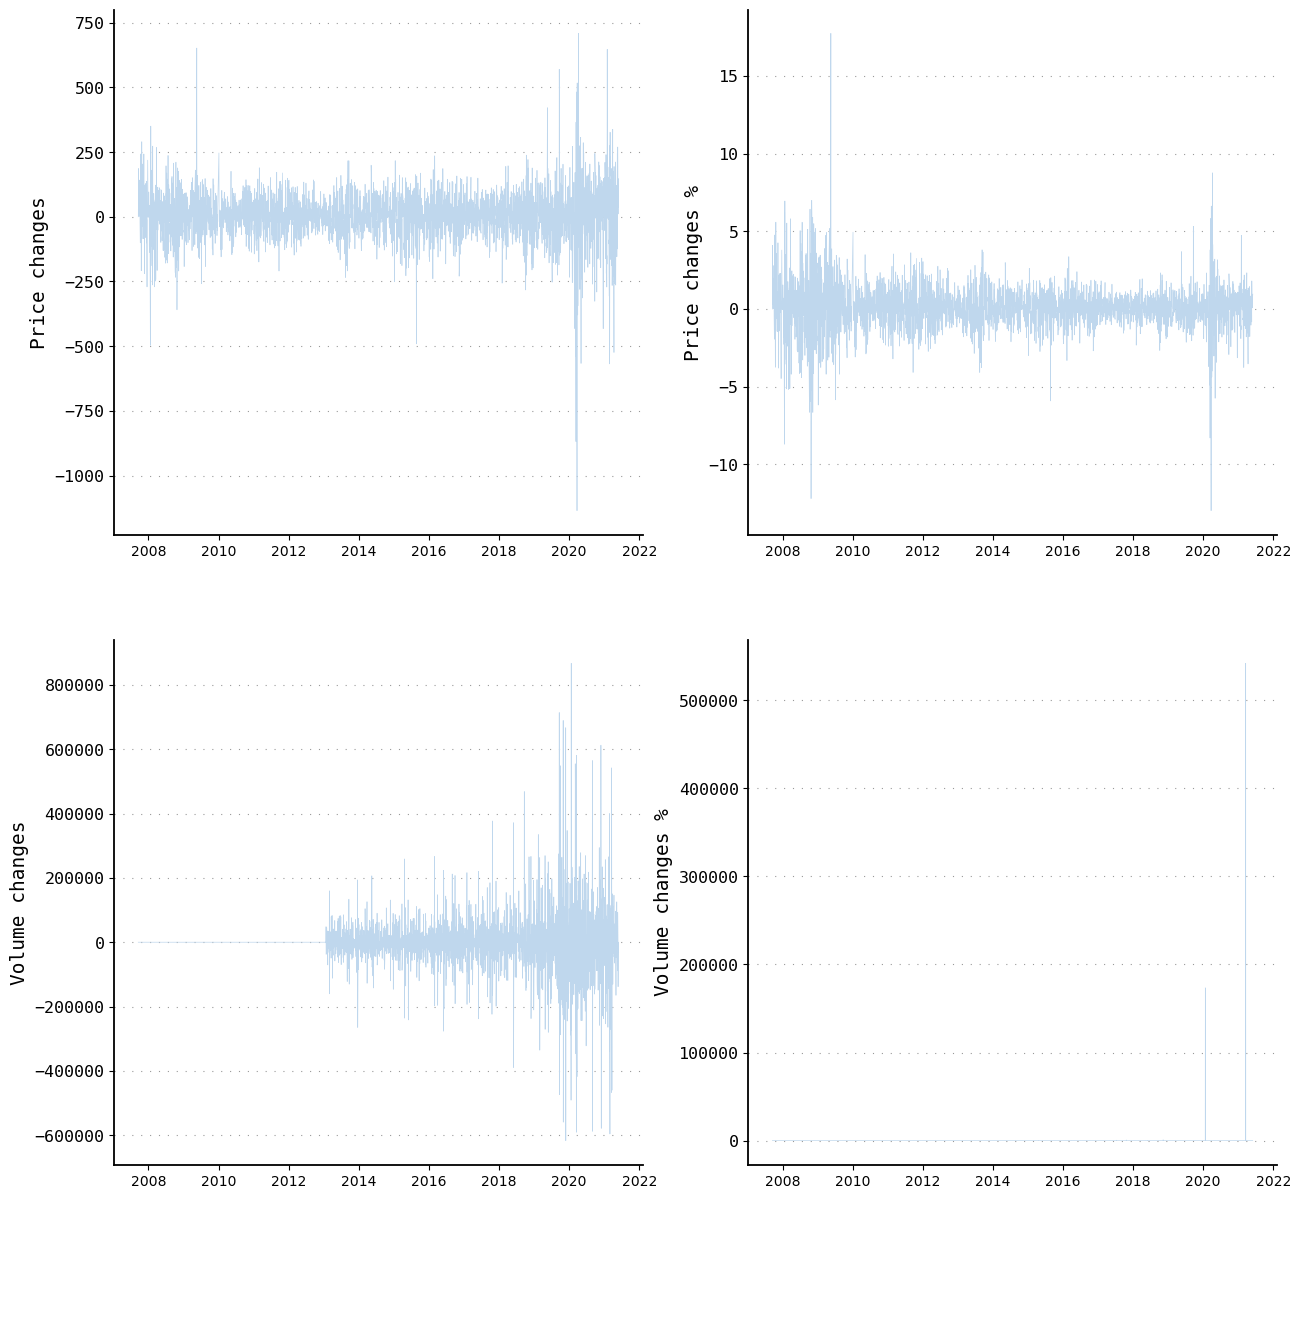

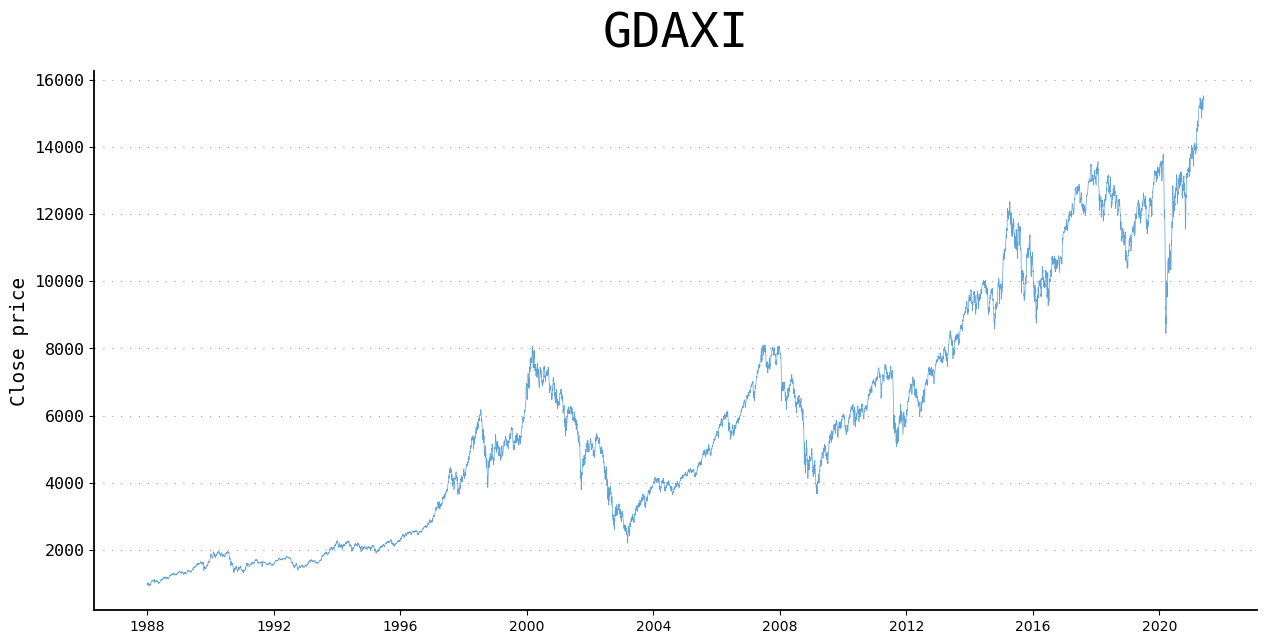

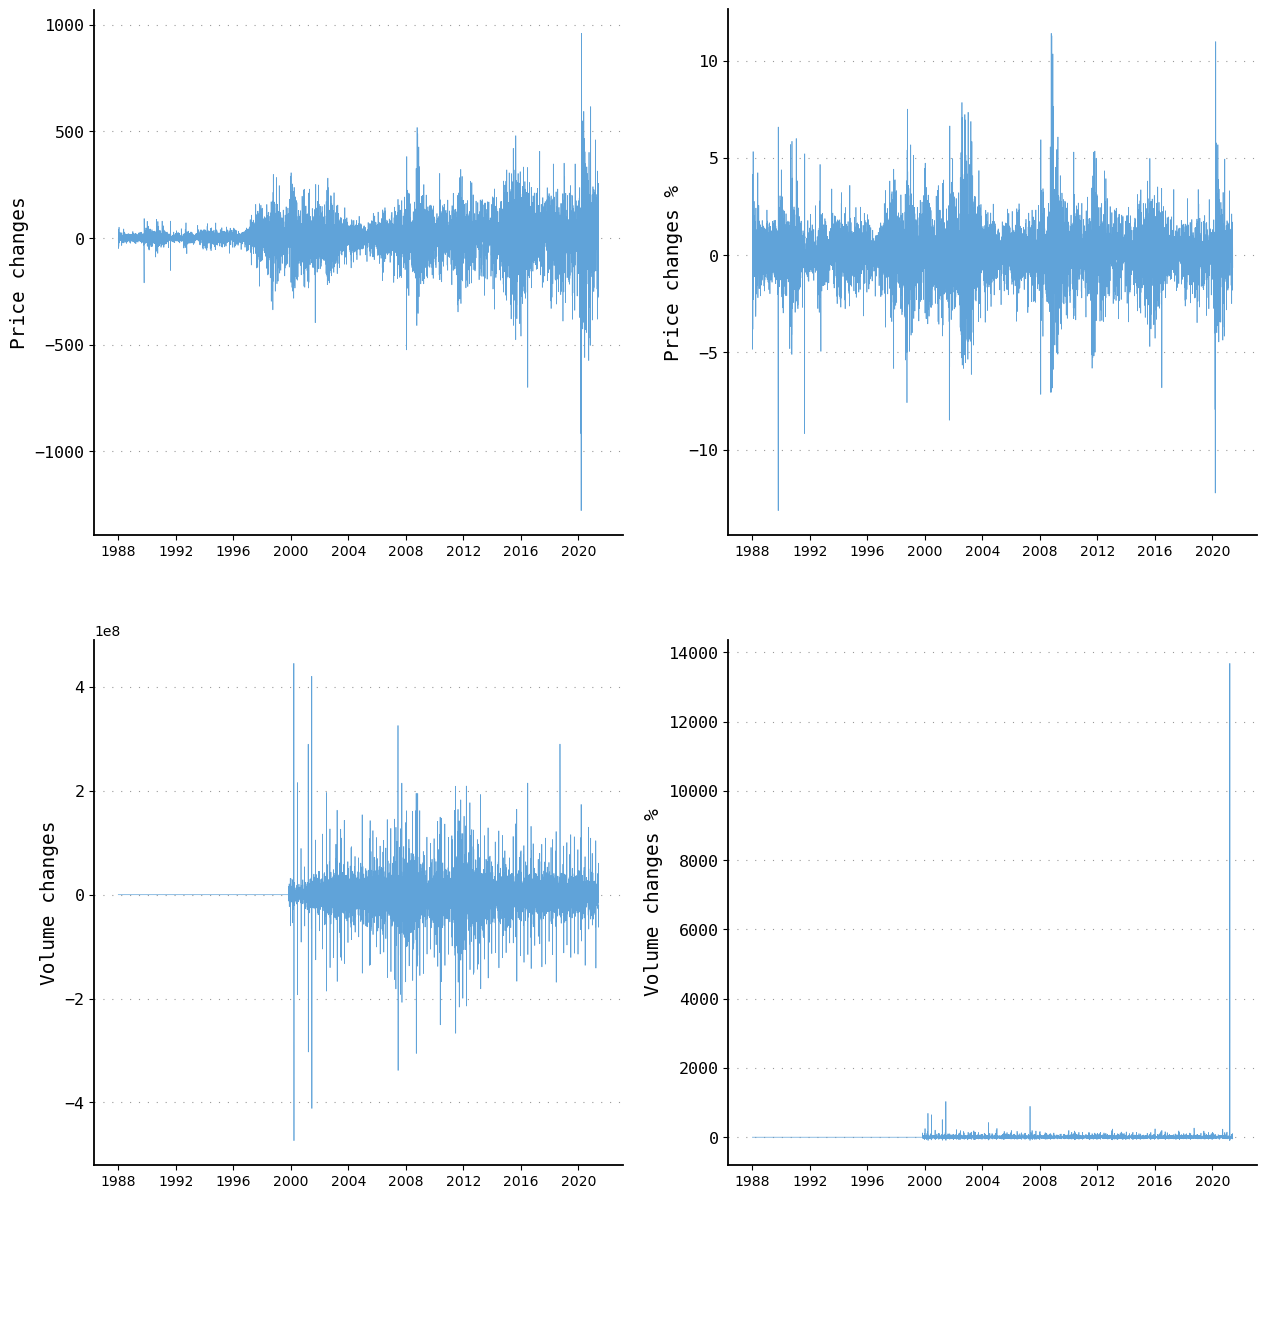

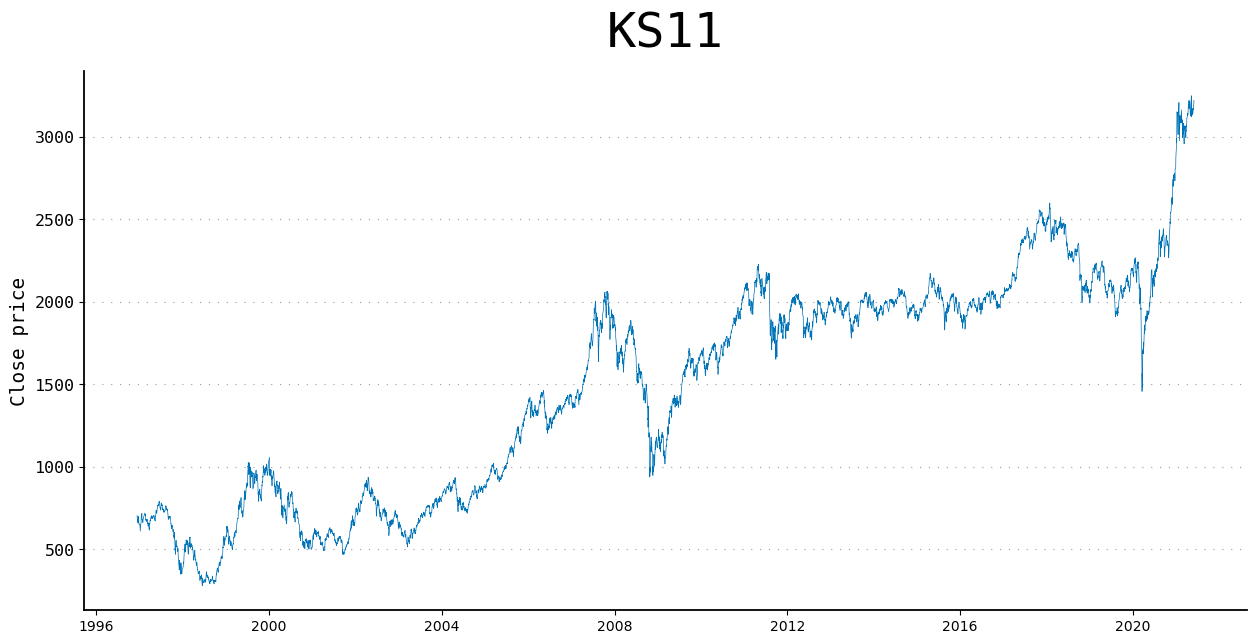

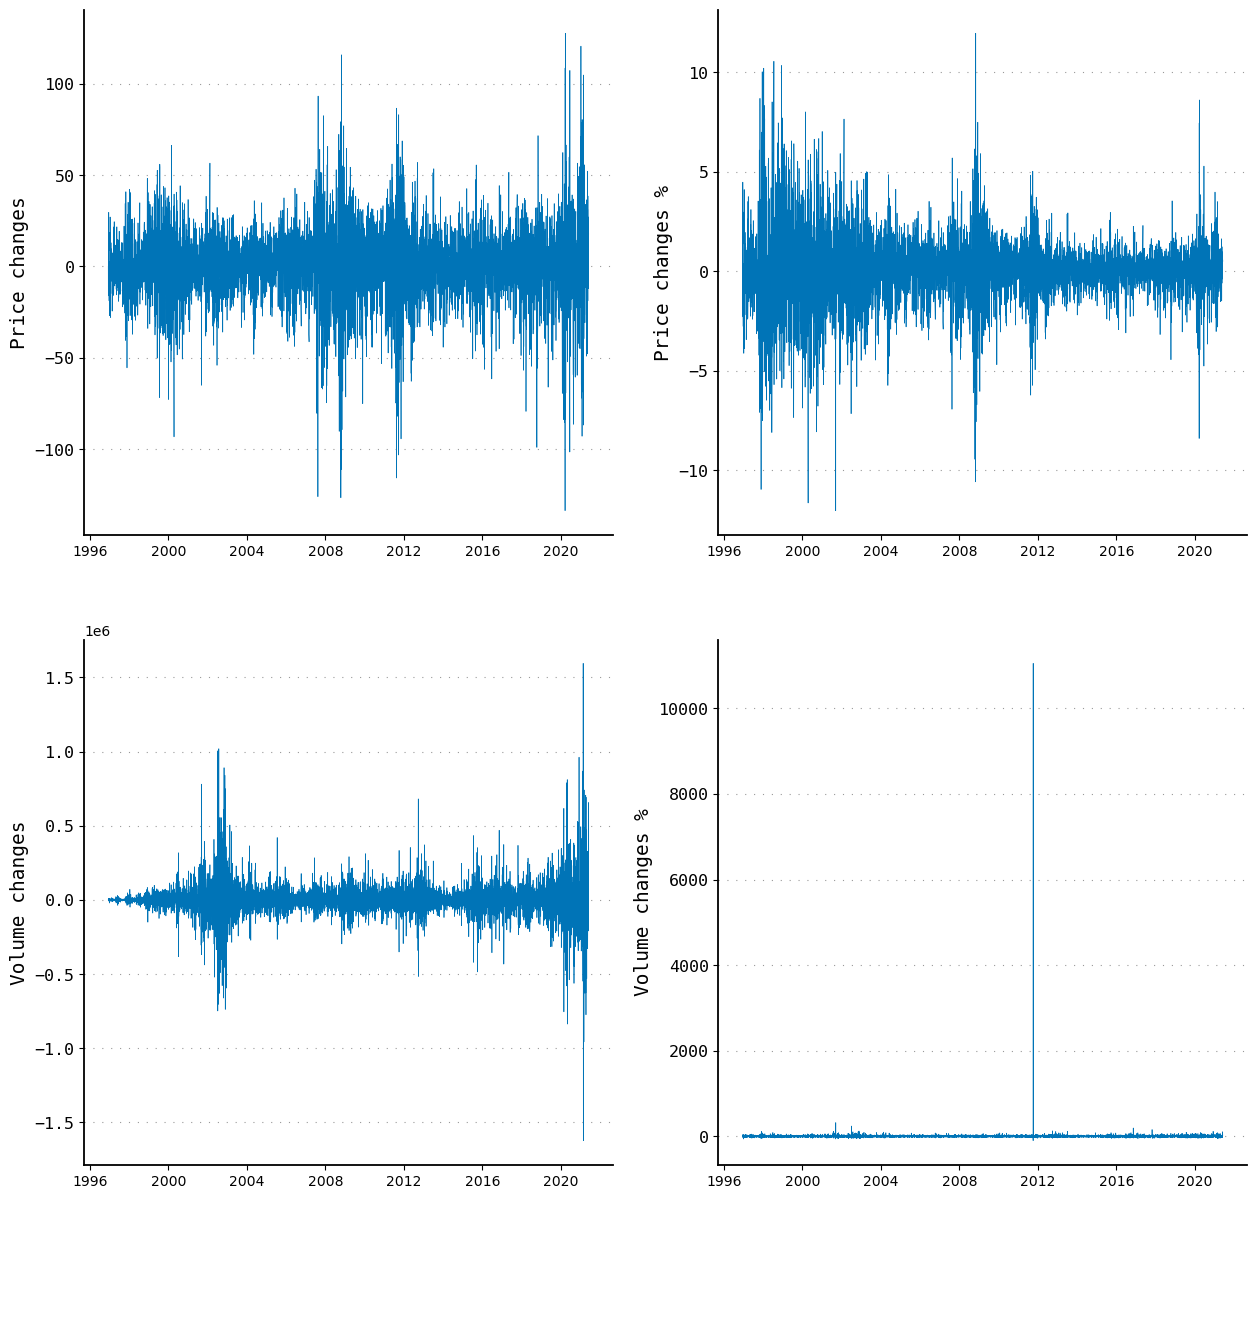

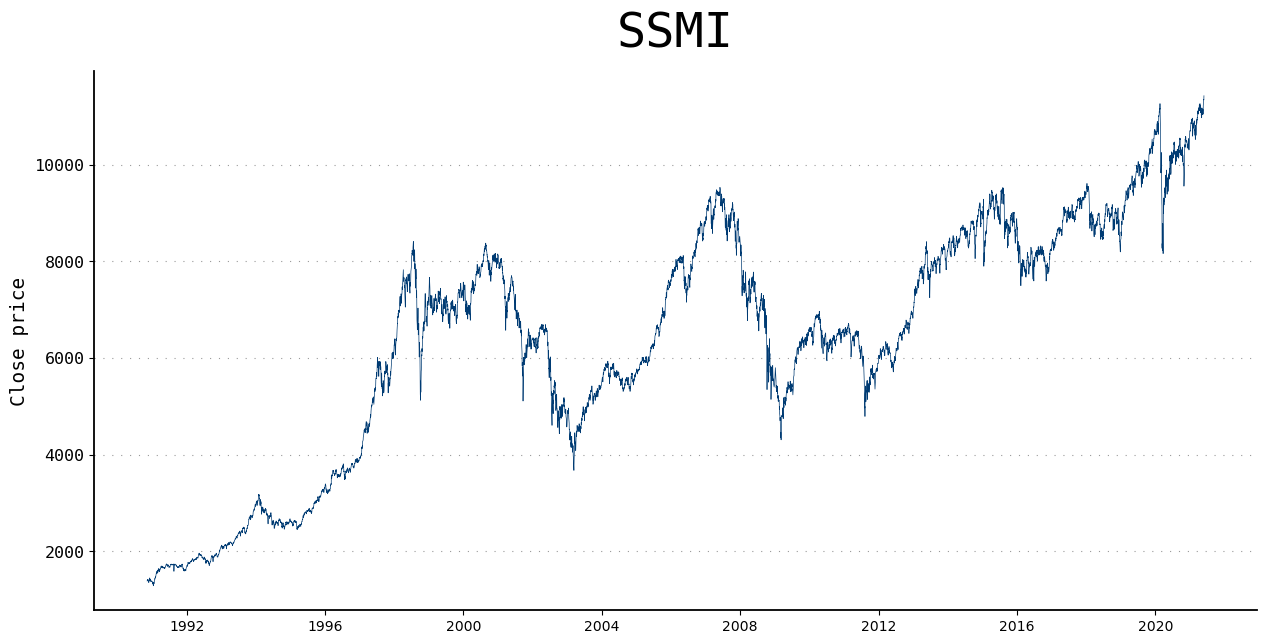

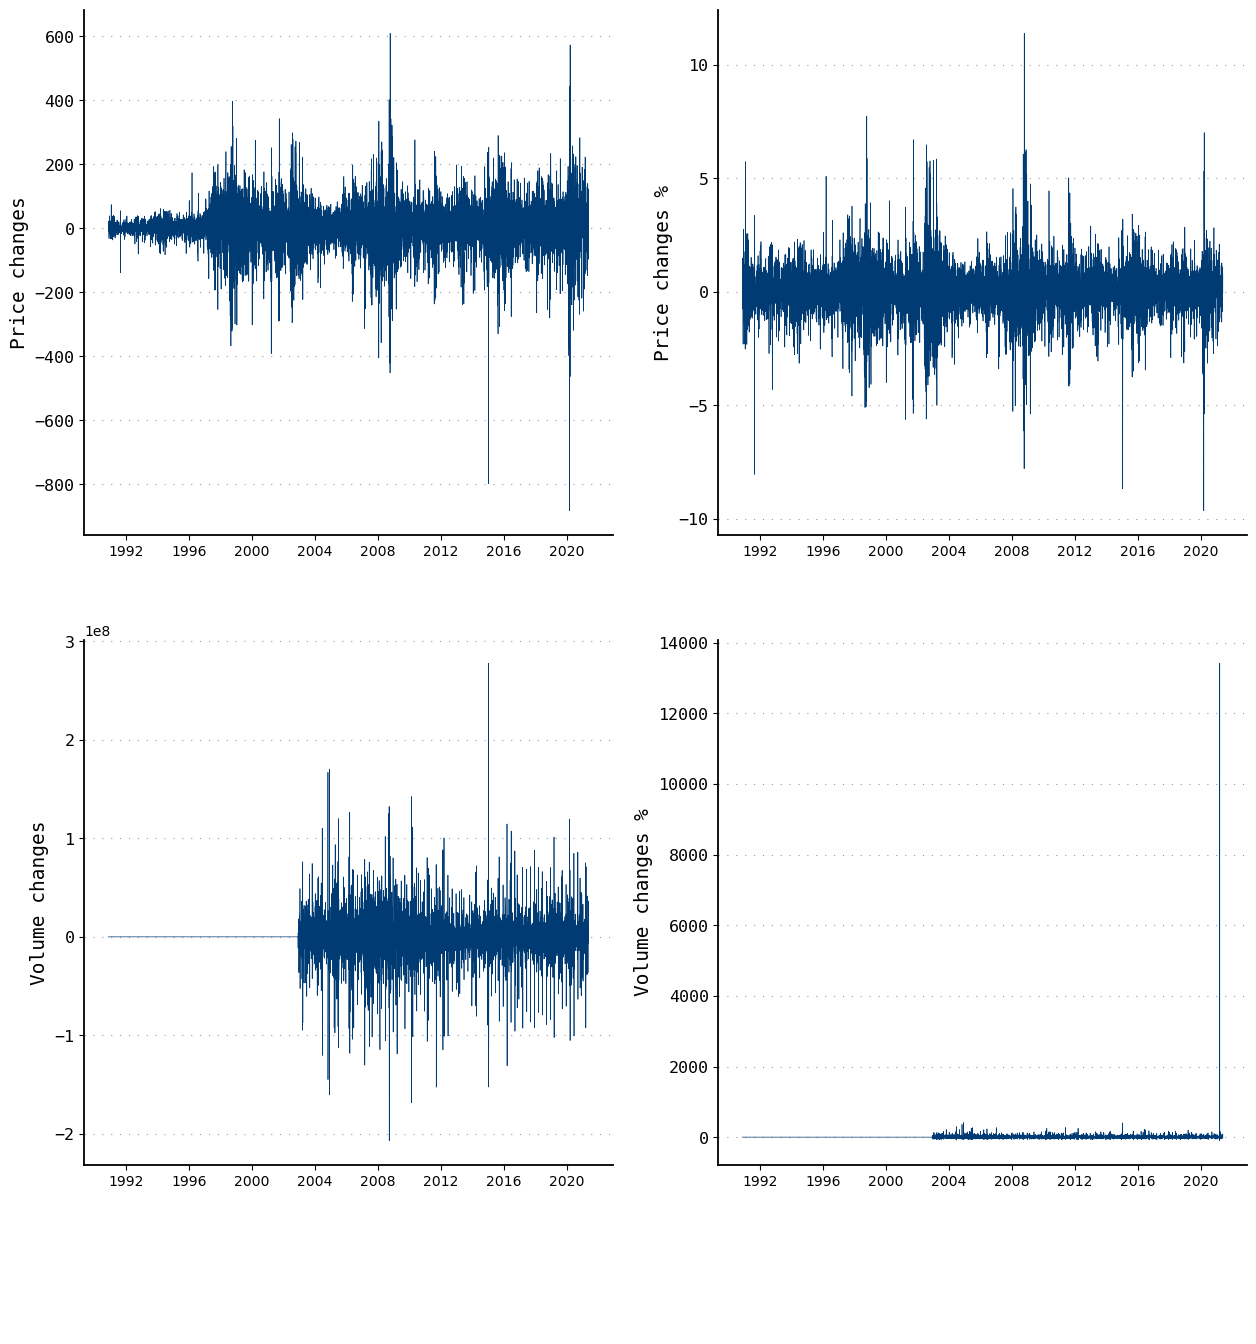

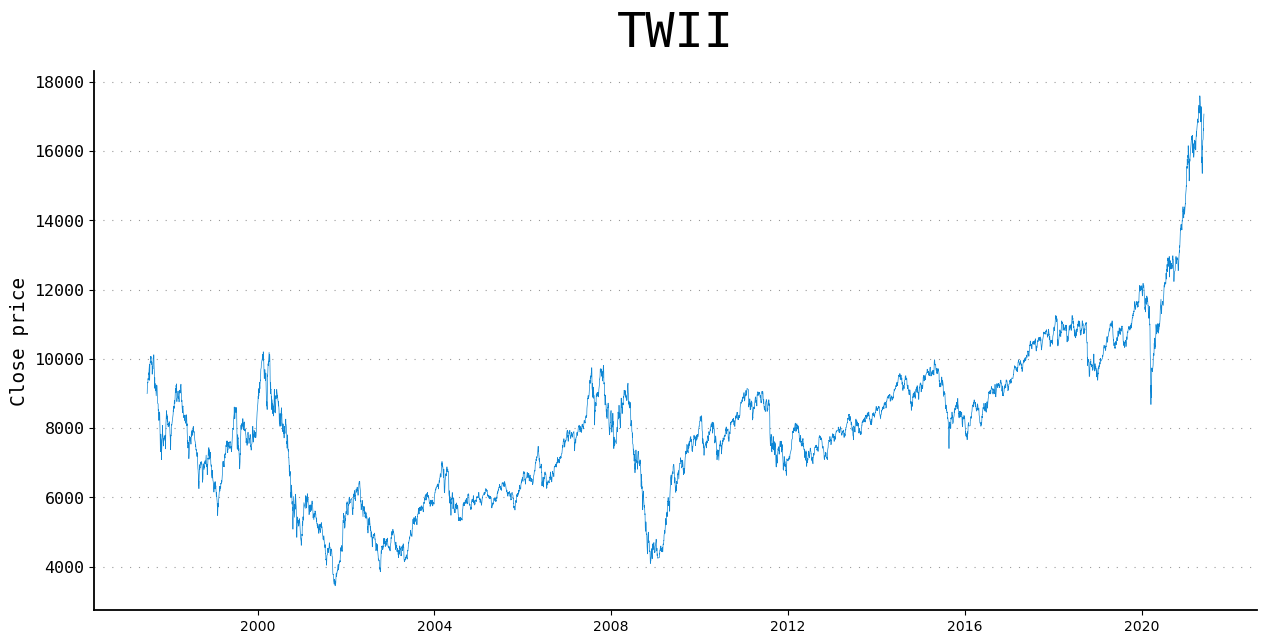

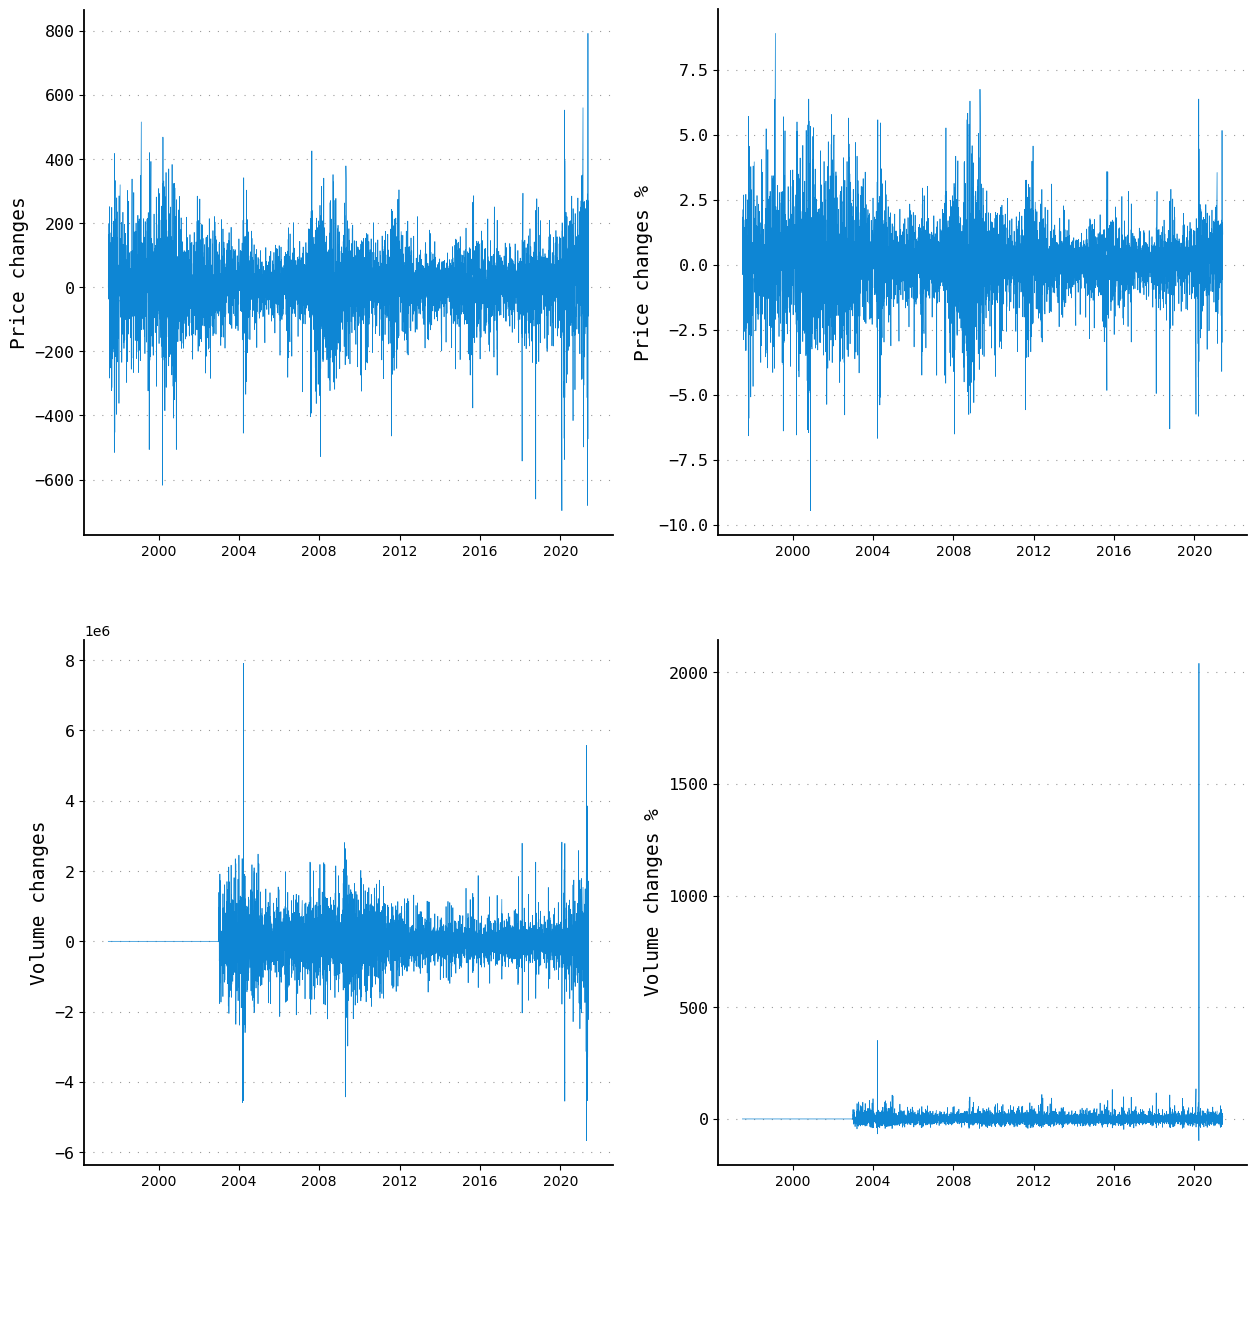

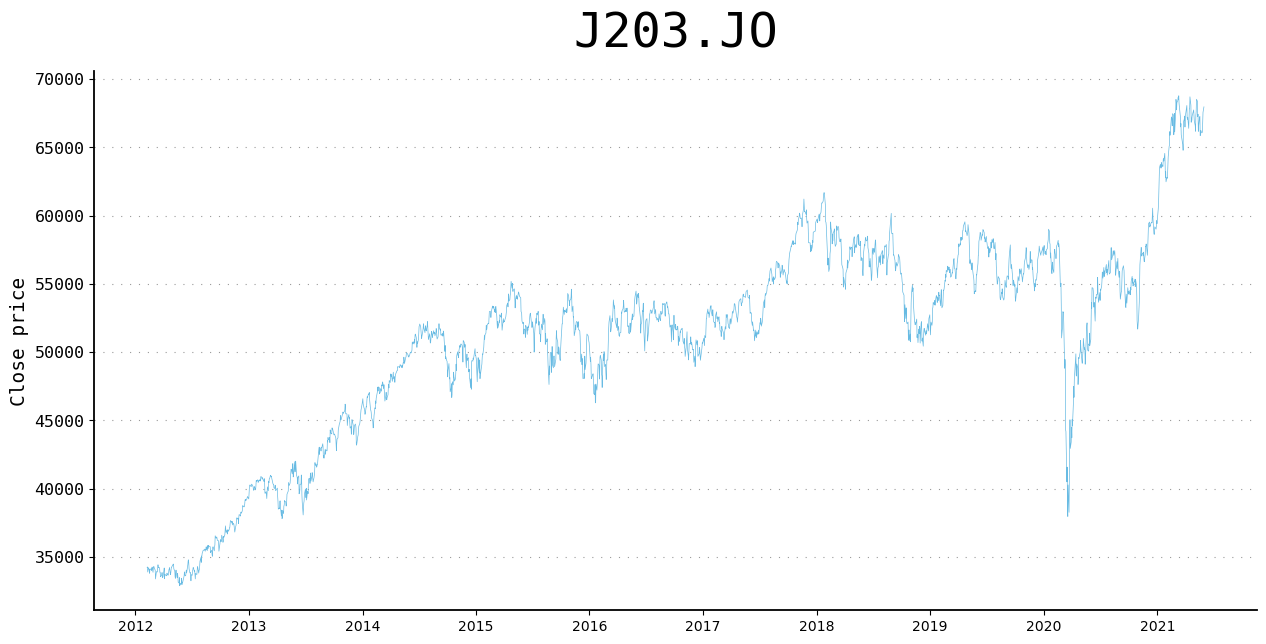

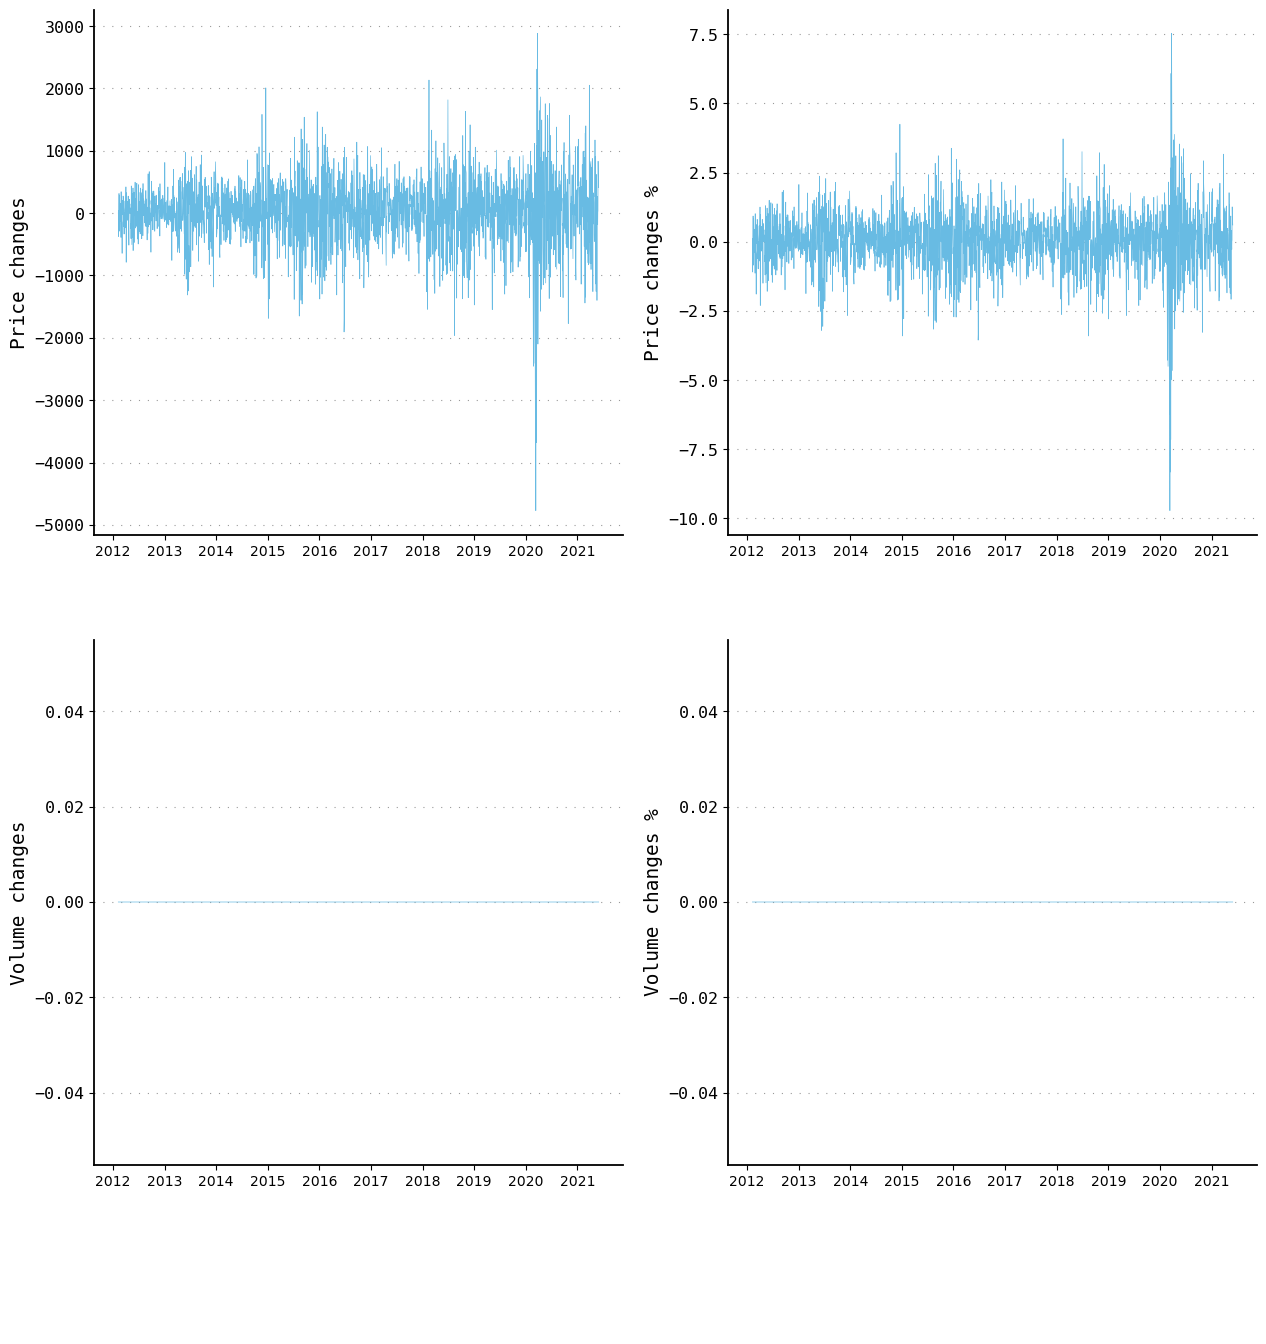

In [8]:
eda()

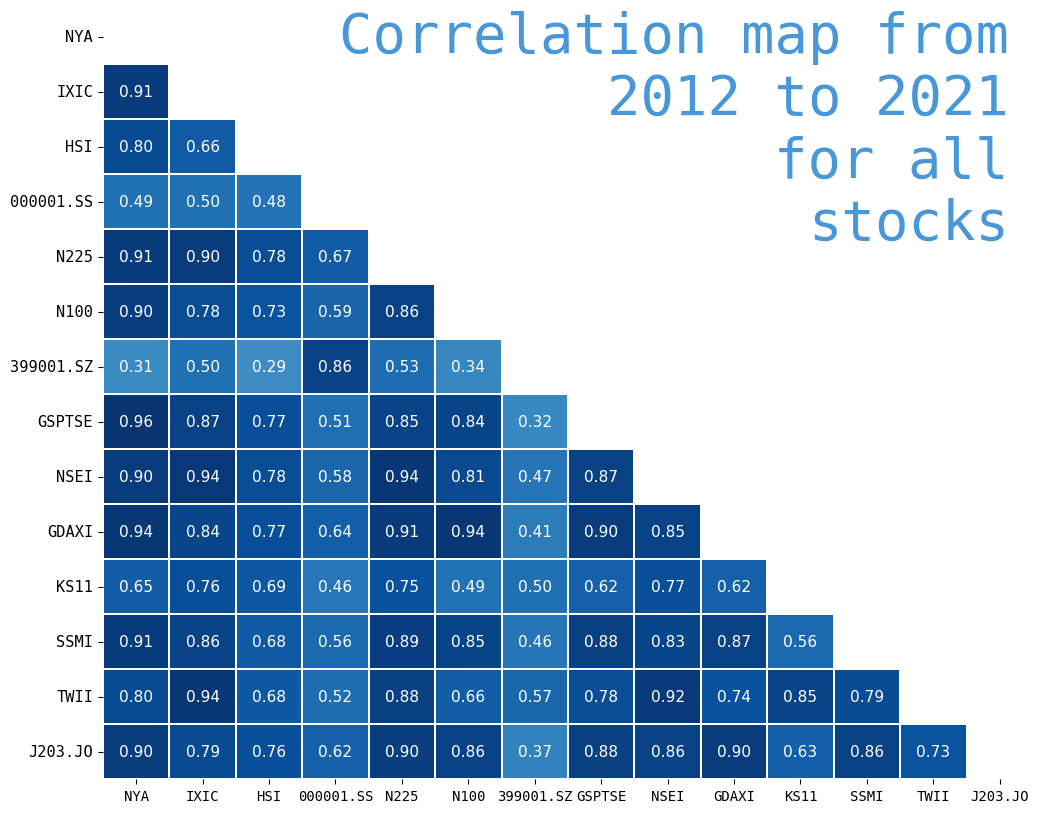

In [9]:
corr_map = pd.DataFrame()
for stock in info['Index'].tolist():
    corr_map[stock] = df.query("Index == @stock & year >= 2012")['Close'].reset_index()['Close']

matrix = np.triu(corr_map.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(corr_map.corr(), annot = True, cmap = 'Blues', fmt=".2f", mask = matrix, vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False, annot_kws = {'fontsize': 11})
plt.xticks(size = 10, fontname = 'monospace')
plt.yticks(size = 11, fontname = 'monospace')
plt.figtext(0.88, 0.65, '''Correlation map from
2012 to 2021
for all
stocks''', fontsize = 40, fontname = 'monospace', ha = 'right', color = '#4897d8')
plt.show()